# CellPy Tutorial

CellPy is a Python-based method of classifying single cell RNA sequencing datasets. The classifier implements the XGBoost (Chen and Guestrin, 2016) algorithm to predict cell types once it is trained on a reference dataset. 

Paper: 

## Pre-CellPy Steps

CellPy requires a normalized expression matrix and metadata as arguments when classifying single cell RNA sequencing datasets. The normalized expression matrix is fed into the command line under the argument **trainNormExpr** or **predNormExpr**. The metadata is fed into the command line under the argument **trainMetadata** or **predMetadata**.

This normalized expression matrix and metadata can be generated through the following R code:

In [ ]:
#R code
# Exporting the Normalized Gene Expression Matrix
library(scrattch.io)
write_dgCMatrix_csv(seurat.object@assays$RNA@data, "~/cellpy_files/normalized_expression.csv")

# Exporting the MetaData For Cross Validation 
seurat.object_metadata = seurat.object@meta.data
seurat.object_metadata = seurat.object_metadata[ , c("Celltype1", "Celltype2", "Timepoint", "Celltype3")]
write.csv(seurat.object_metadata,"~/cellpy_files/metadata.csv")

## CellPy Usage

CellPy has been formatted into a wrapper function that can be easily run through the command line of the Terminal. 
**NOTE:** All Python and XGBoost versions must remain the same throughout usage of all training, predicting, and feature ranking options. Ex) If Python 3.7 is used to train a dataset, Python 3.7 must be used to predict a query dataset using the trained dataset.

### CellPy Run Option Summary and Examples

CellPy offers 3 different run modes: training, prediction, and feature ranking. Trains on each layer and outputs a new Layer object for each layer....


gene  GCCACTACTCTCCG-6  ATTCTTCTTGGAAA-5  GGCTCACTGGTTAC-6  \
0     MIR1302-10                 0                 0                 0   
1        FAM138A                 0                 0                 0   
2          OR4F5                 0                 0                 0   
3   RP11-34P13.7                 0                 0                 0   
4   RP11-34P13.8                 0                 0                 0   
5     AL627309.1                 0                 0                 0   
6  RP11-34P13.14                 0                 0                 0   
7   RP11-34P13.9                 0                 0                 0   
8     AP006222.2                 0                 0                 0   

   AAGATGGAGAATCC-1  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
5                 0  
6                 0  
7                 0  
8                 0

0    1                    2
0       B-cell  NaN                  NaN
1     Basophil  NaN                  NaN
2    Dendritic  NaN                  NaN
3   Macrophage  NaN                  NaN
4     Monocyte  NaN                  NaN
5           NK  NaN                  NaN
6     Platelet  NaN                  NaN
7       T-cell  CD4  Effector Memory CD4
8          NaN  NaN    Naive/Central CD4
9          NaN  NaN            T-reg CD4
10         NaN  CD8  Effector Memory CD8
11         NaN  NaN            Naive CD8
12         NaN  NaN            Temra CD8

0    1    2     3
0     Z  NaN  NaN   NaN
1     A   A1  A1A   NaN
2   NaN  NaN  A1B   NaN
3   NaN   A2  A2A   NaN
4   NaN  NaN  A2B  A2B1
5   NaN  NaN  NaN  A2B2
6   NaN   A3  NaN   NaN
7   NaN   A4  A4A   NaN
8   NaN  NaN  A4B   NaN
9   NaN  NaN  A4C   NaN
10  NaN   A5  NaN   NaN
11    B   B1  NaN   NaN
12  NaN   B2  B2A   NaN
13  NaN  NaN  B2B   NaN
14  NaN  NaN  B2C   NaN
15  NaN  NaN  B2D   NaN
16  NaN   B3  NaN   NaN
17  NaN   B4  NaN   NaN
18    C   C1  NaN   NaN
19  NaN   C2  NaN   NaN
20    D  NaN  NaN   NaN
21    E  NaN  NaN   NaN

Unnamed: 0 Celltype1 Celltype2            Celltype3
0  GCCACTACTCTCCG-6    T-cell       CD4            T-reg CD4
1  ATTCTTCTTGGAAA-5    T-cell       CD4            T-reg CD4
2  GGCTCACTGGTTAC-6    T-cell       CD4    Naive/Central CD4
3  AAGATGGAGAATCC-1    T-cell       CD4  Effector Memory CD4
4  ACGATGACGGTGTT-4        NK       NaN                  NaN
5  CTATAGCTAGGTTC-3    T-cell       CD4    Naive/Central CD4
6  ACCAGCCTGTACAC-5    T-cell       CD8            Naive CD8
7  TTCCTAGATCGATG-8  Platelet       NaN                  NaN
8  TGAGTCGATCGATG-5    T-cell       CD4  Effector Memory CD4
9  CCTCTACTAGGCGA-3    T-cell       CD8            Temra CD8

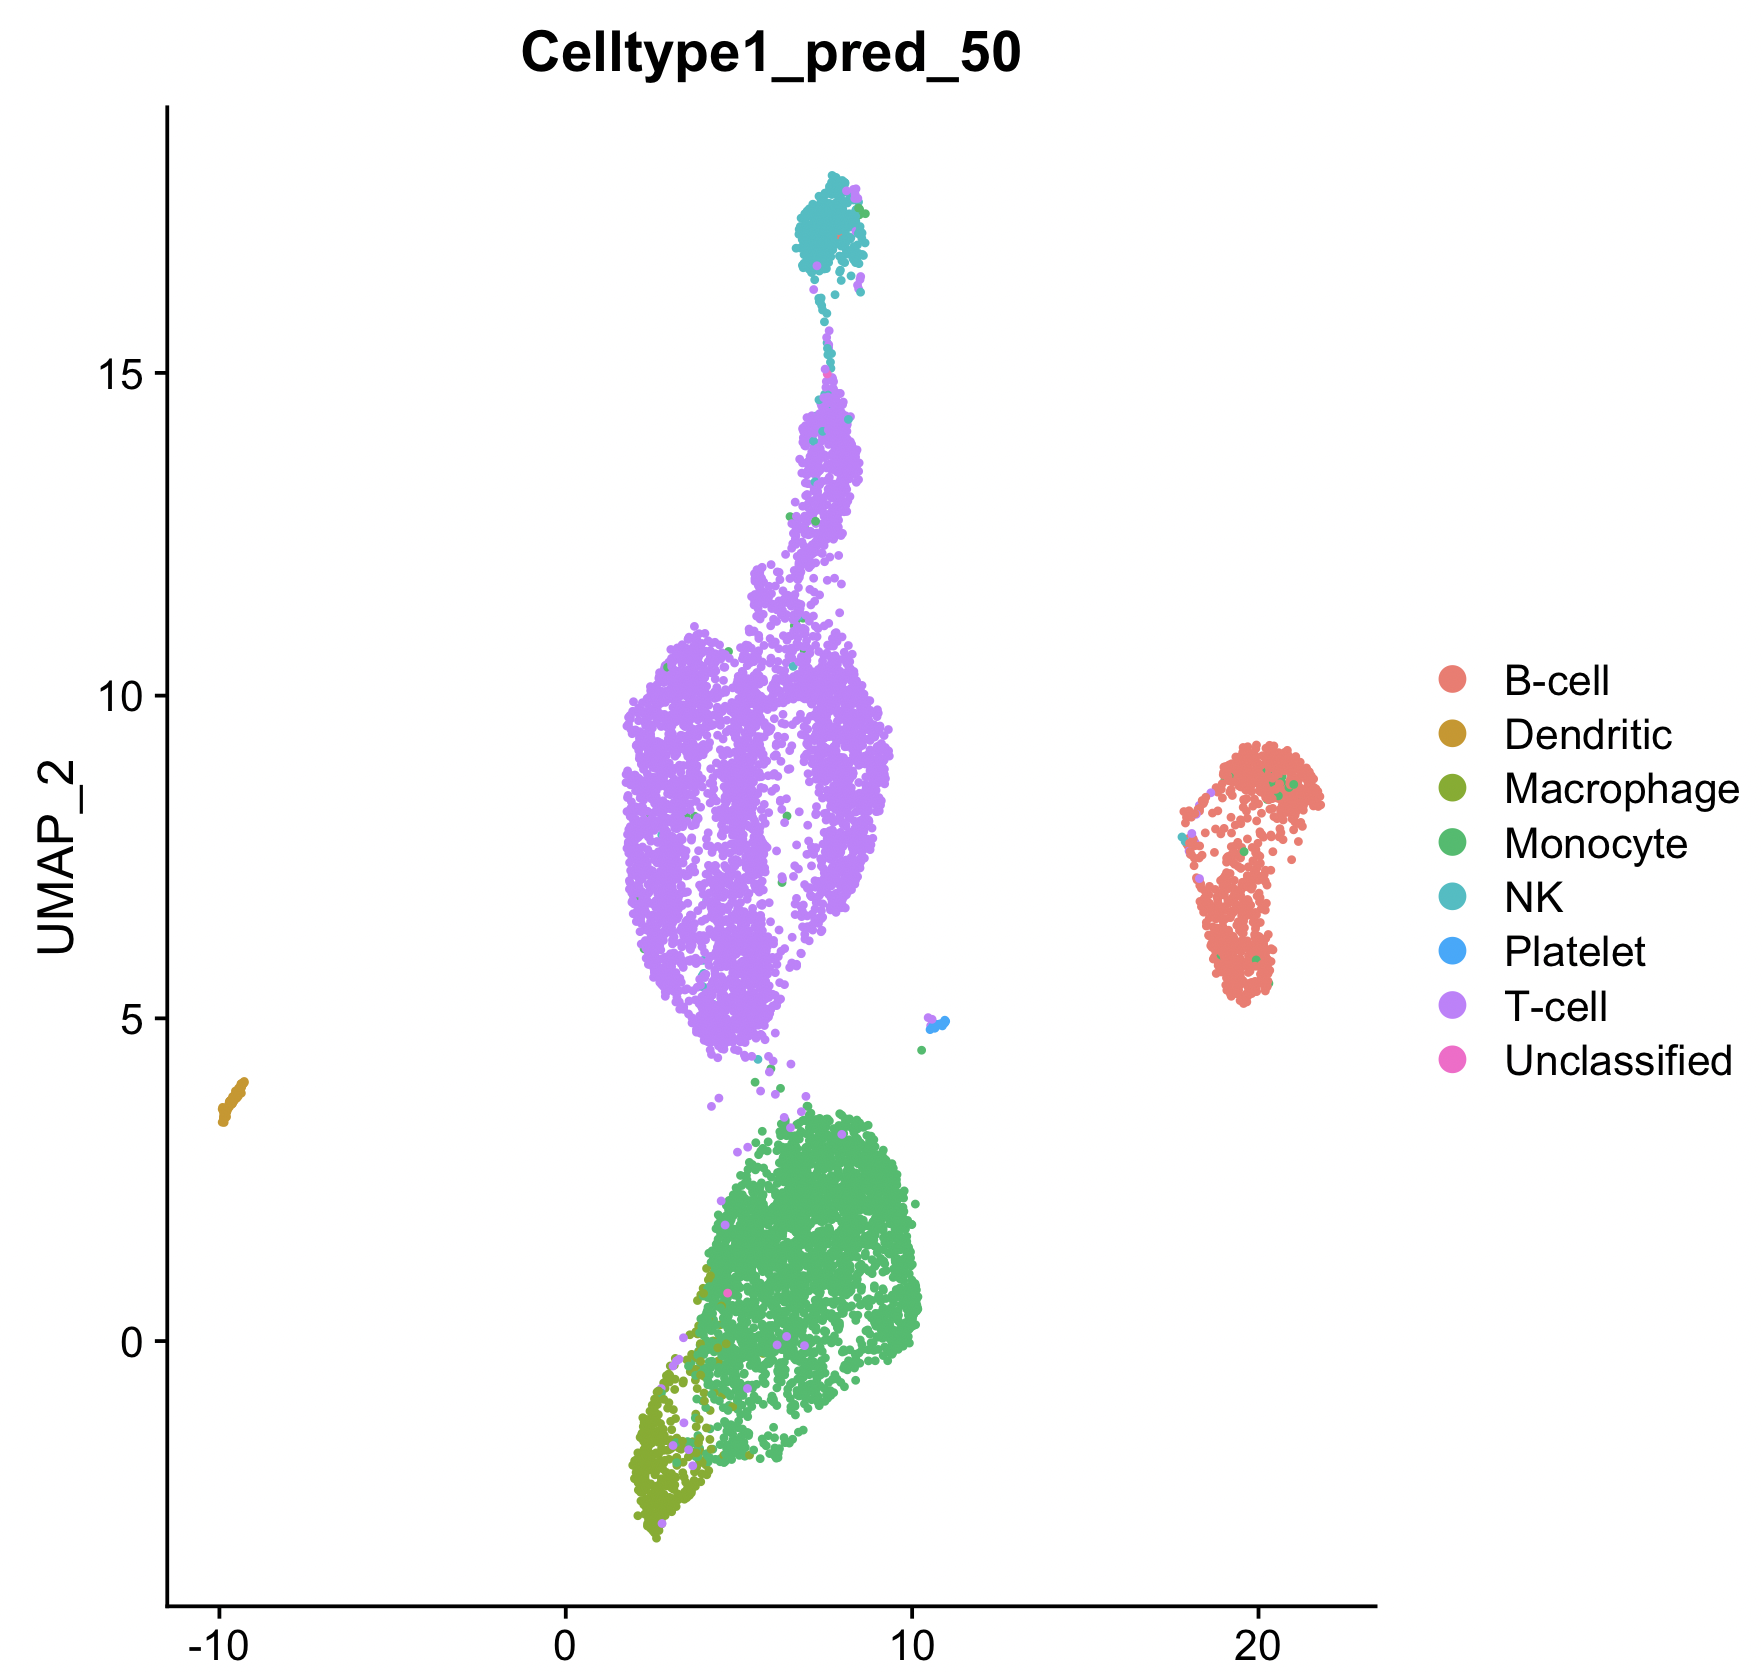

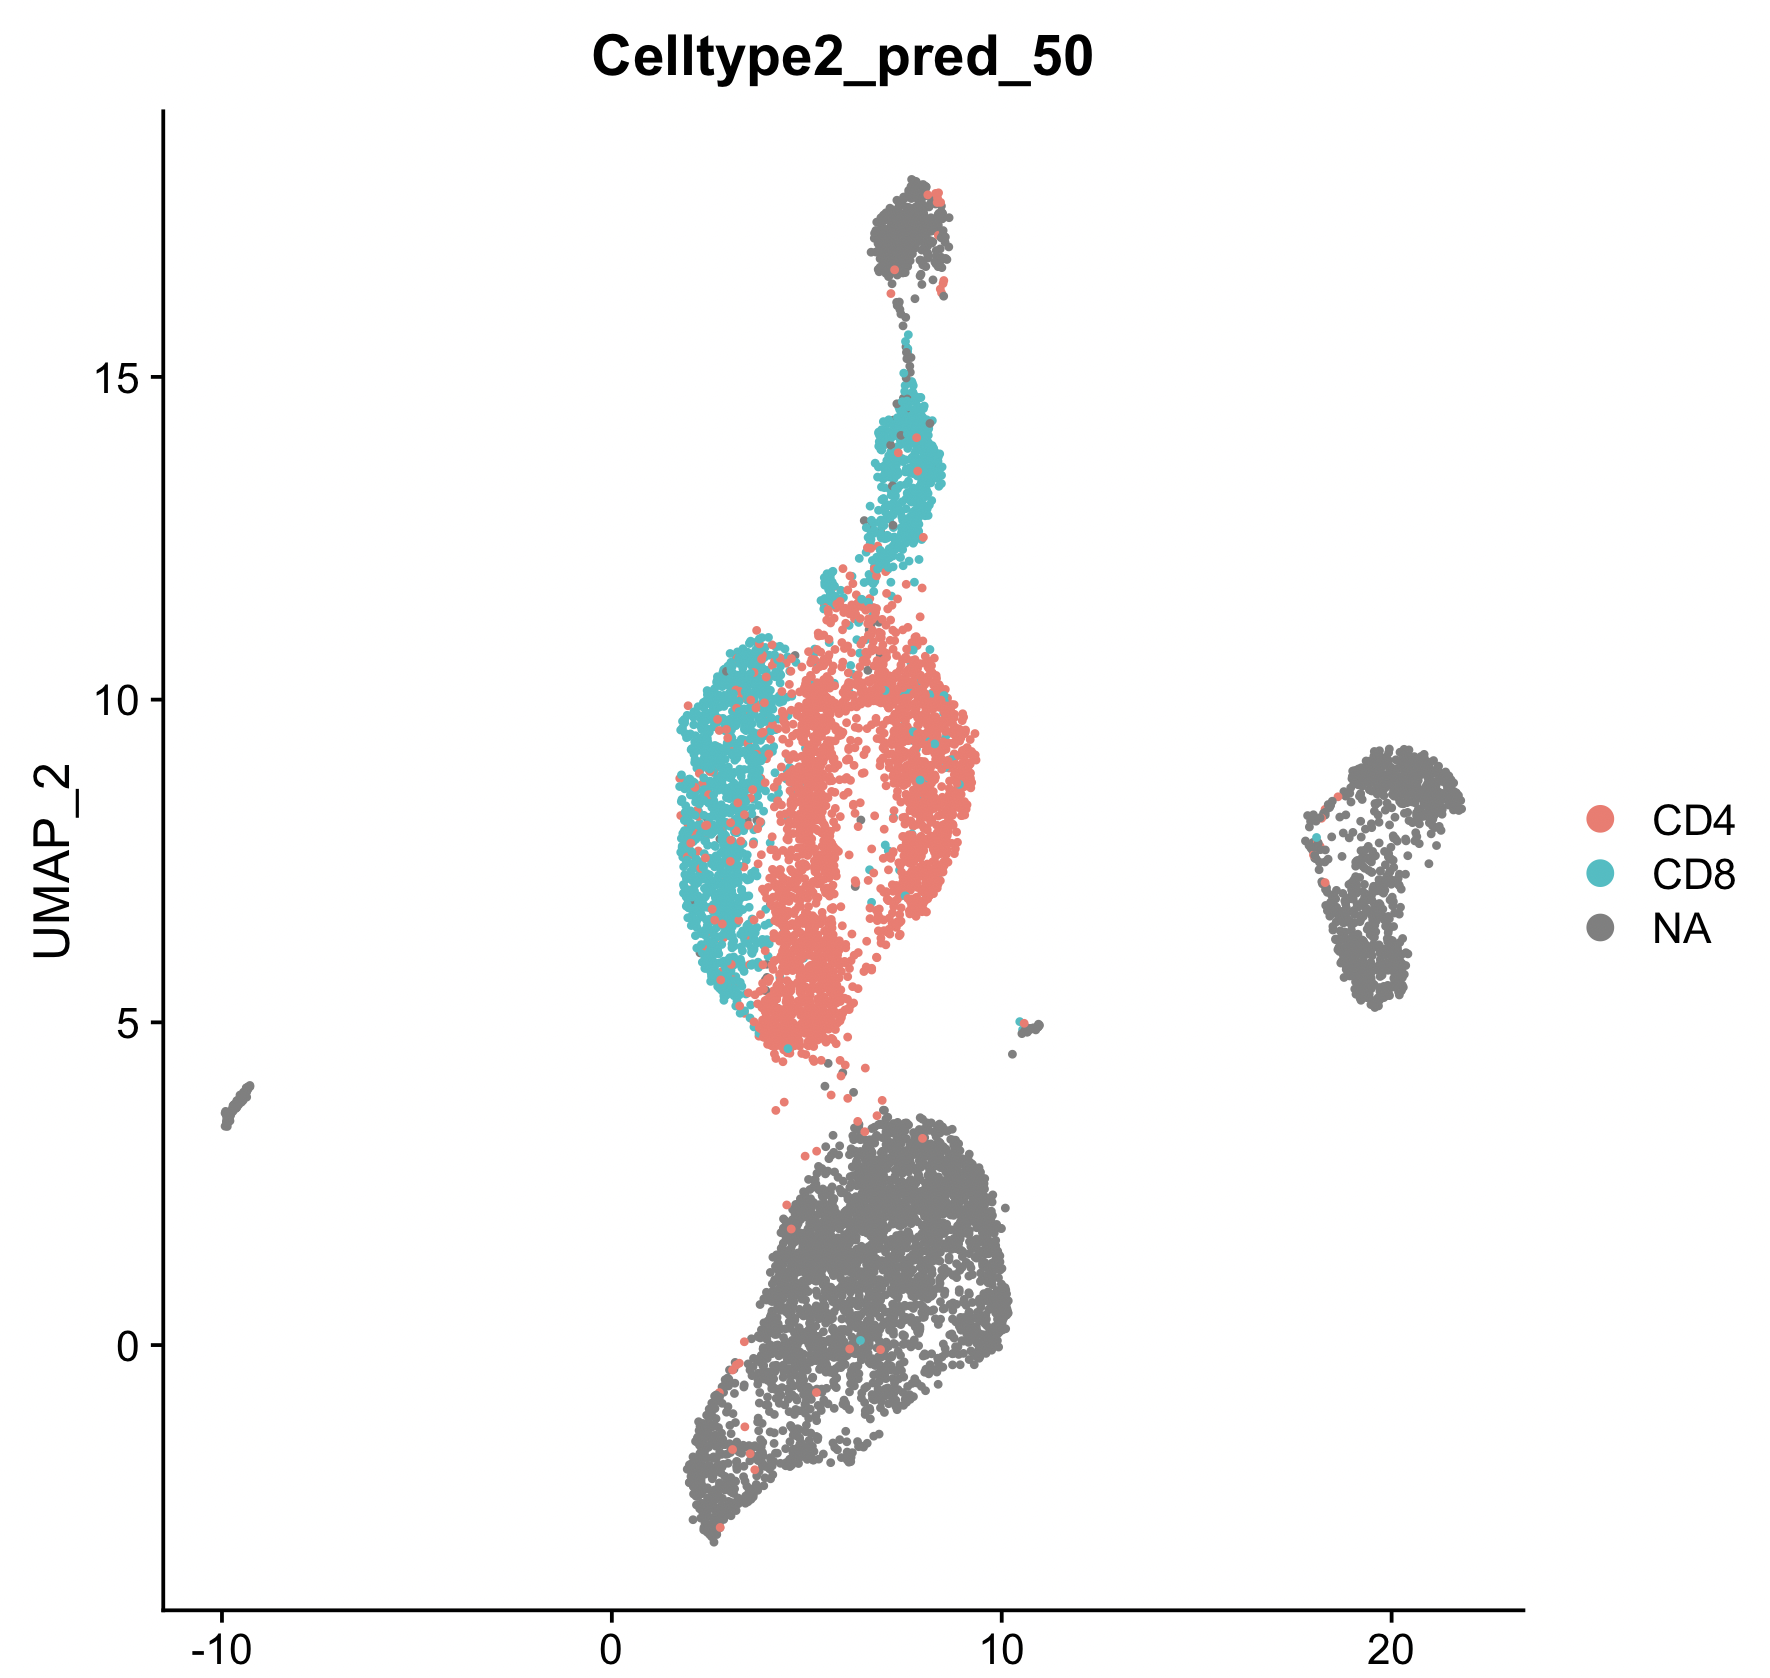

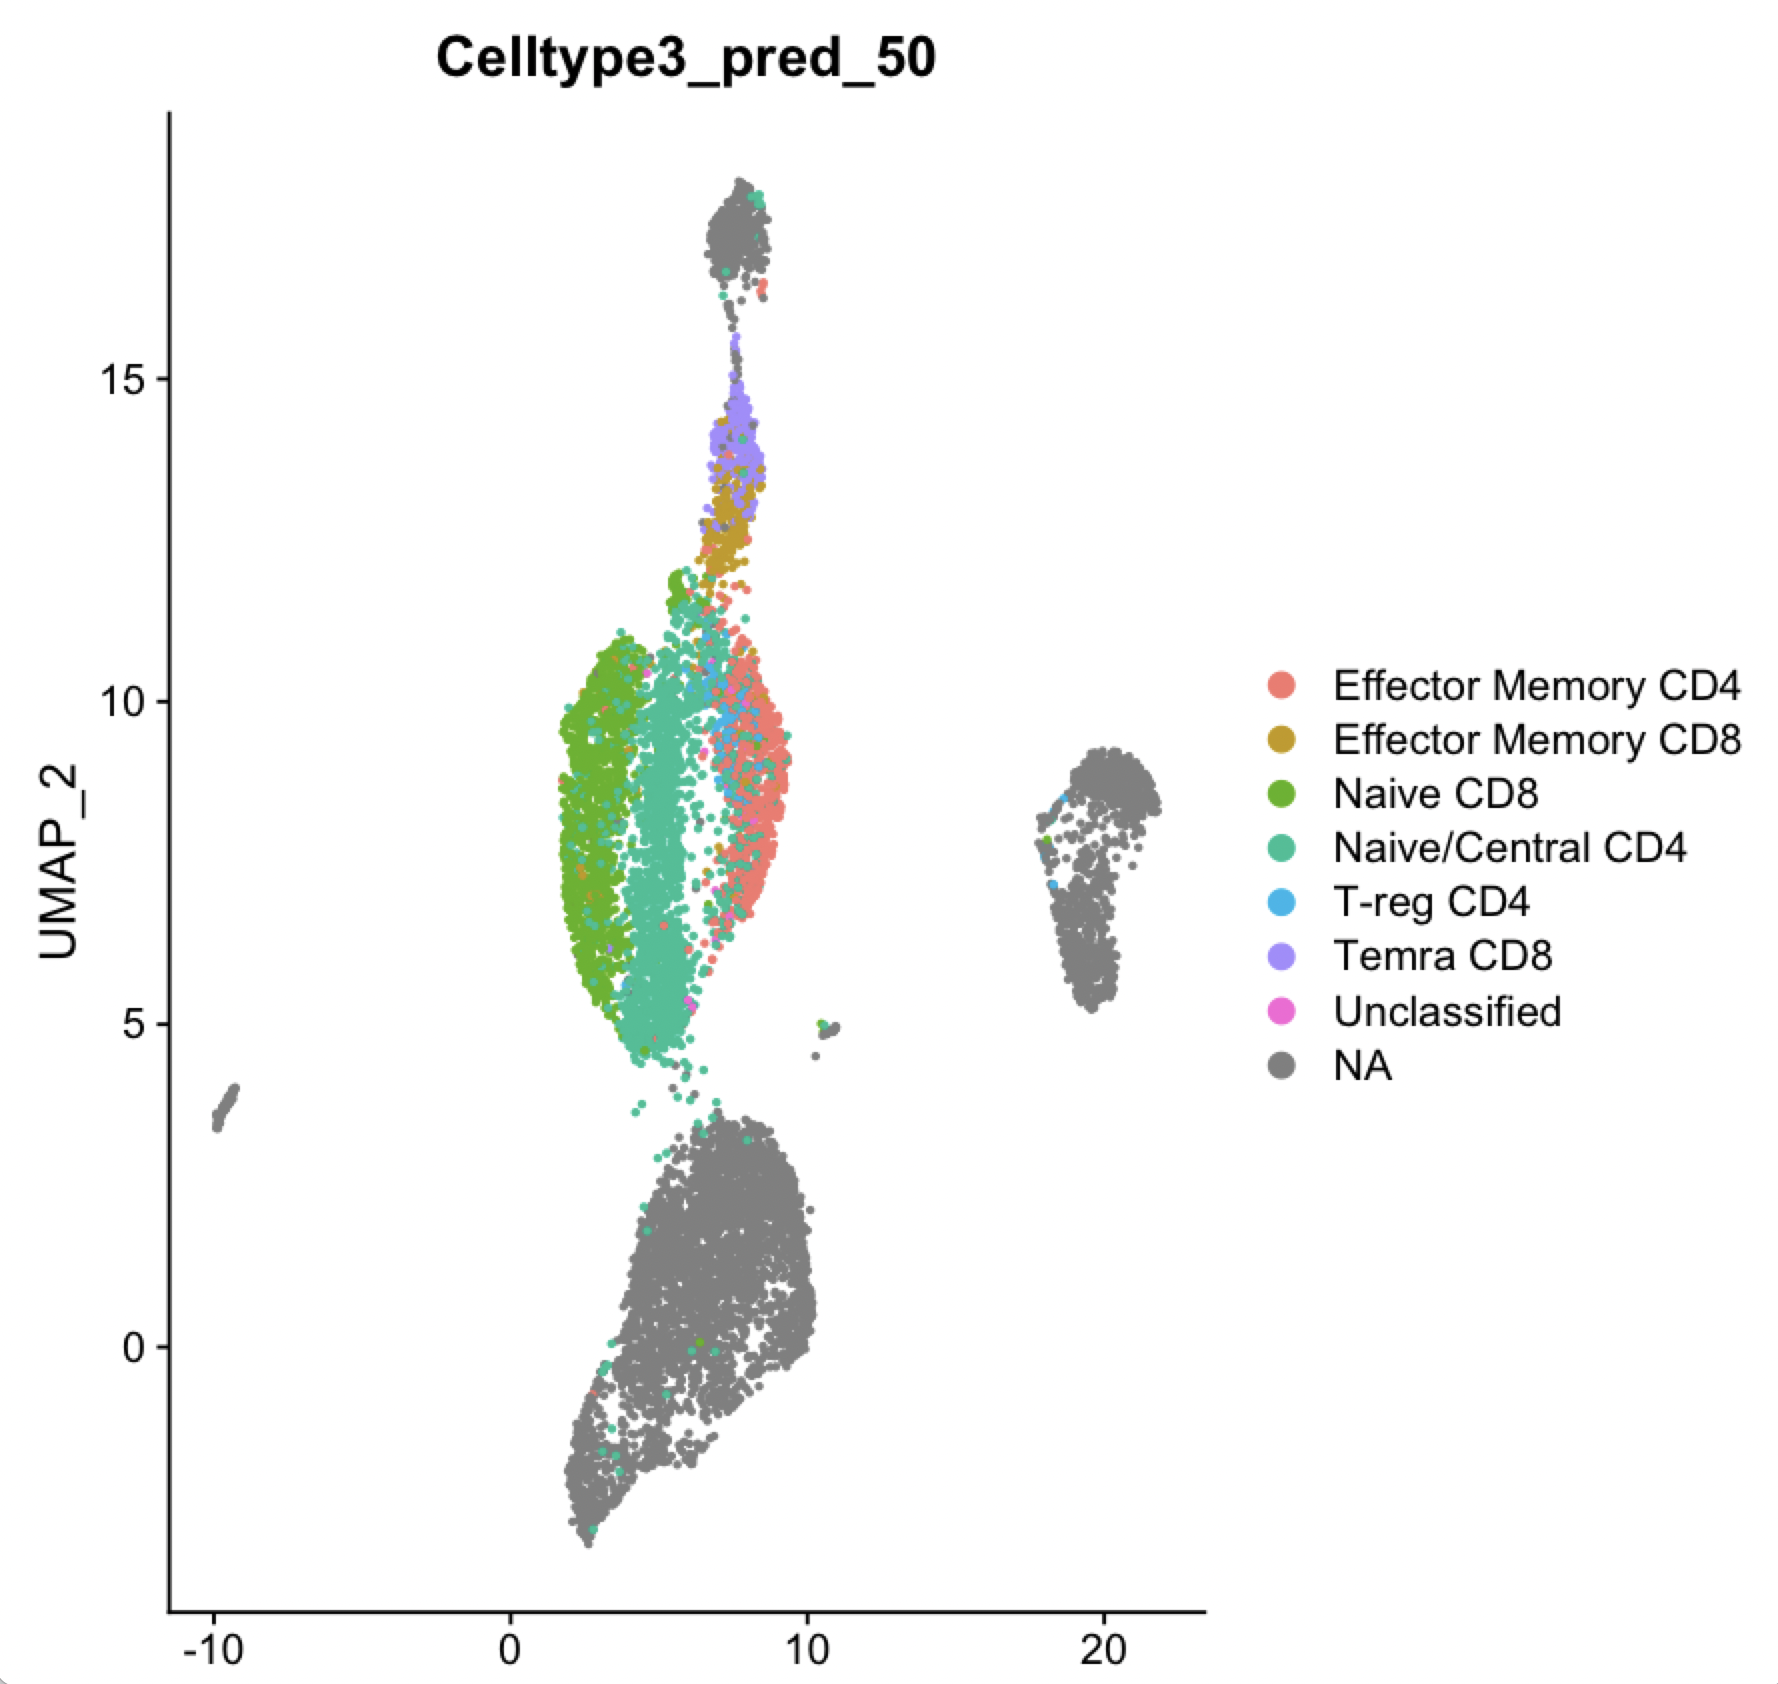

In [ ]:
#heat maps of top 10 genes grouped by CellPy predictions

#Celltype1 Layer heat map
#saving active identities to Seurat object to a column called Celltype1_pred
Idents(pbmc10k) <- pbmc10k$Celltype1_pred_50

pbmc10k.markers <- FindAllMarkers(pbmc10k, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
pbmc10k.markers %>% group_by(cluster) %>% top_n(n = 2, wt = avg_log2FC)
top10 <- pbmc10k.markers %>% group_by(cluster) %>% top_n(n = 10, wt = avg_log2FC)

png(filename="~/Desktop/pbmc10k_Celltype1_pred_50_heatmap.png", width=1200, height=1200)
par(mar=c(5,6,4,100)+.1)
DoHeatmap(pbmc10k, features = top10$gene, size = 6, angle=90) + NoLegend()
dev.off()

Heatmap generated from datasets run on predictAll default rejection cutoff threshold of 0.5:

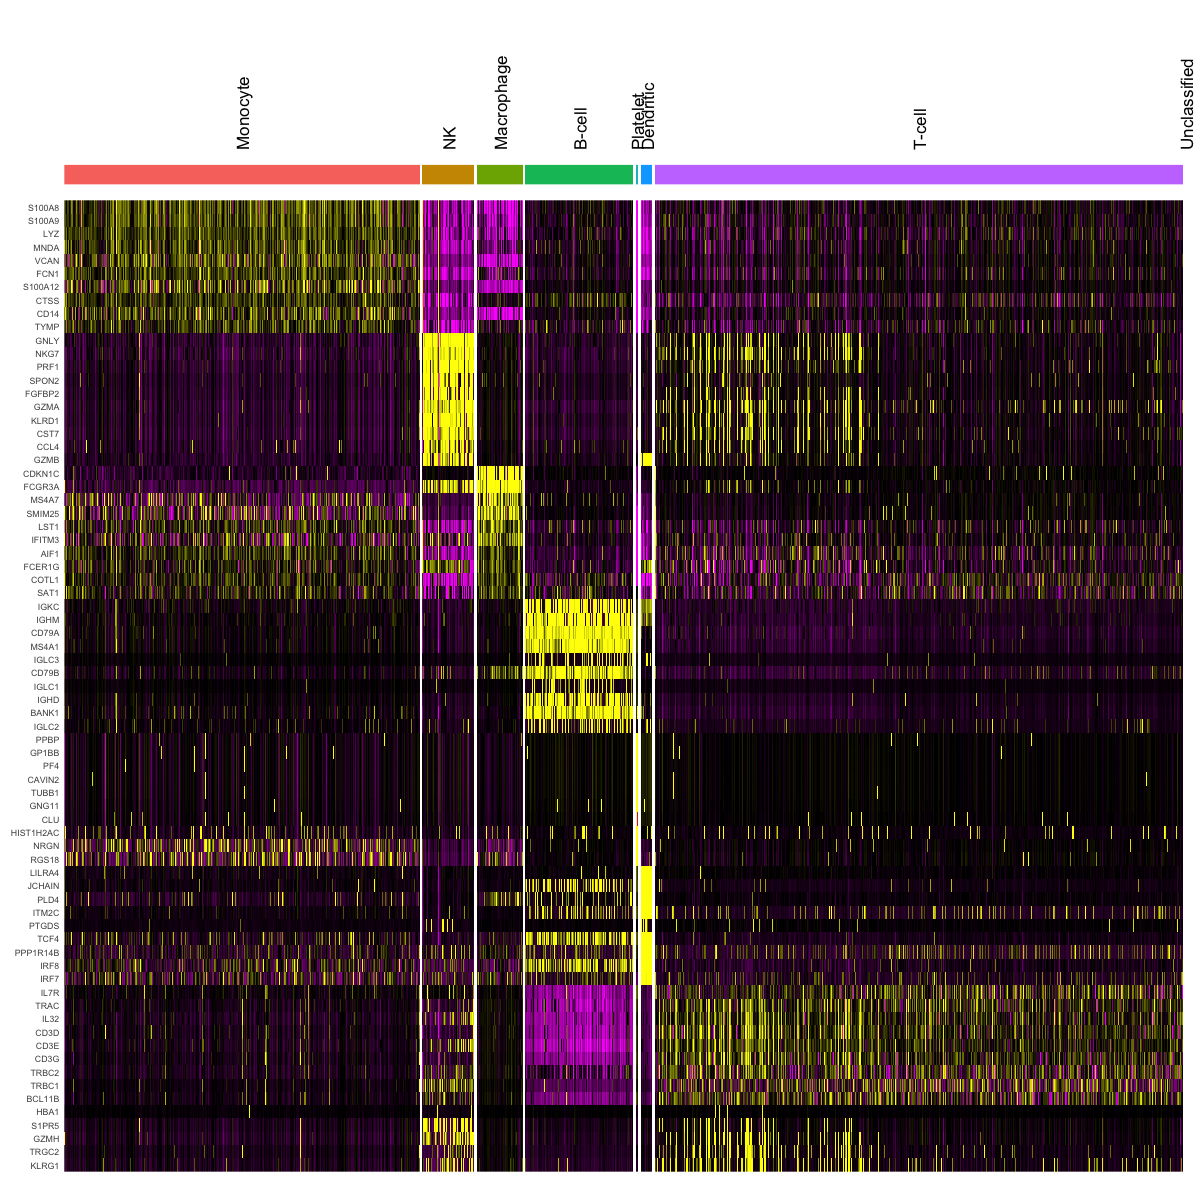

By increasing the threshold for the rejection cutoff in the prediction options, cell type predictions improve at the expense of throwing away cells with lower cell type probability.

Comparison with heatmap generated when datasets ran with a predictAll rejection cutoff of 0.8:

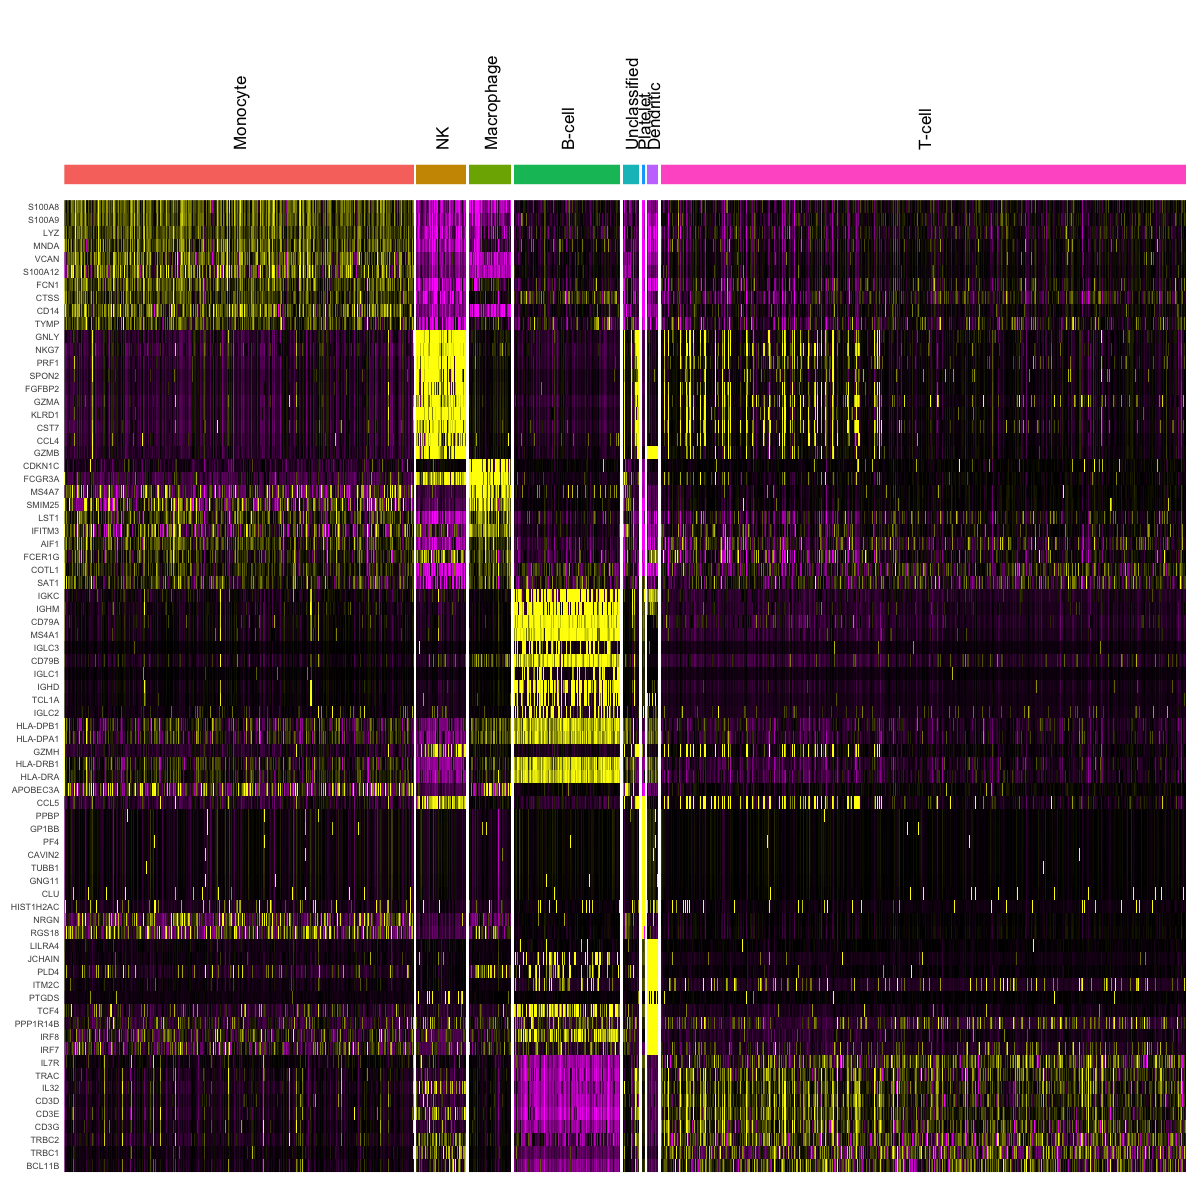

In [ ]:
#Celltype2 Layer heat map
#subset out Layer 2
Idents(pbmc10k) = "Celltype1_pred_50" #makes idents refer to metadata column called "Celltype1_pred_50" where predictions were stored previously
pbmc10k_lyr2 <- subset(pbmc10k, idents="T-cell")

#saving active identities to Seurat object to a column called Celltype2_pred_50
Idents(pbmc10k_lyr2) <- pbmc10k_lyr2$Celltype2_pred_50

pbmc10k.markers.lyr2 <- FindAllMarkers(pbmc10k_lyr2, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
pbmc10k.markers.lyr2 %>% group_by(cluster) %>% top_n(n = 2, wt = avg_log2FC)
top10_2 <- pbmc10k.markers.lyr2 %>% group_by(cluster) %>% top_n(n = 10, wt = avg_log2FC)

png(filename="~/Desktop/pbmc10k_Celltype2_pred_50_heatmap.png", width=1200, height=1200)
par(mar=c(5,6,4,100)+.1)
DoHeatmap(pbmc10k_lyr2, features = top10_2$gene, size = 6, angle=90) + NoLegend()
dev.off()

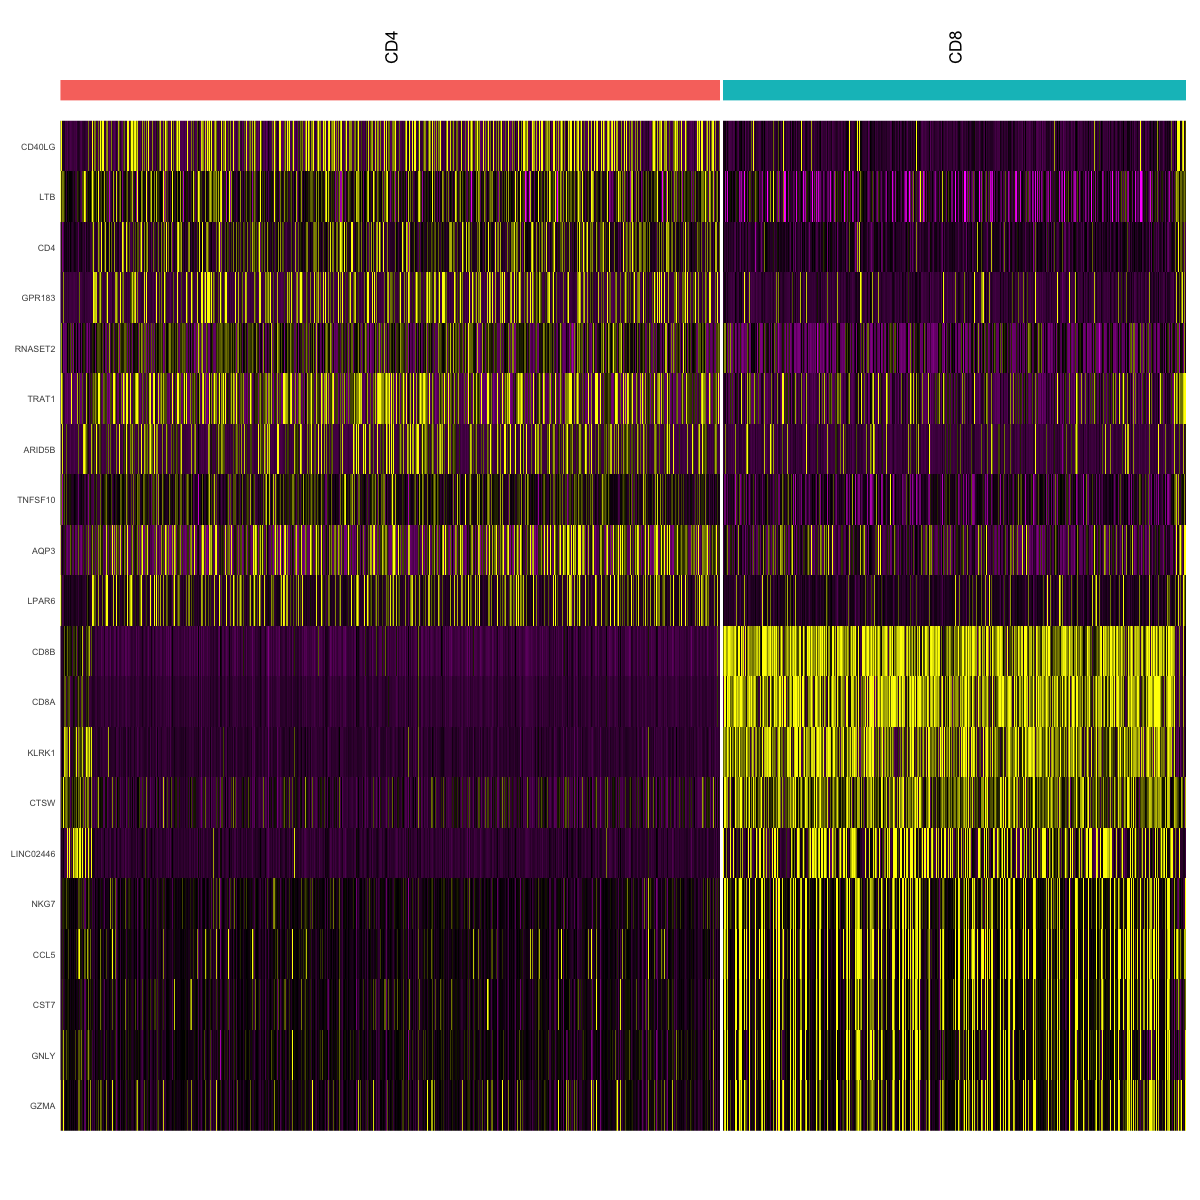

Comparison with heatmap generated when datasets ran with a predictAll rejection cutoff of 0.8:

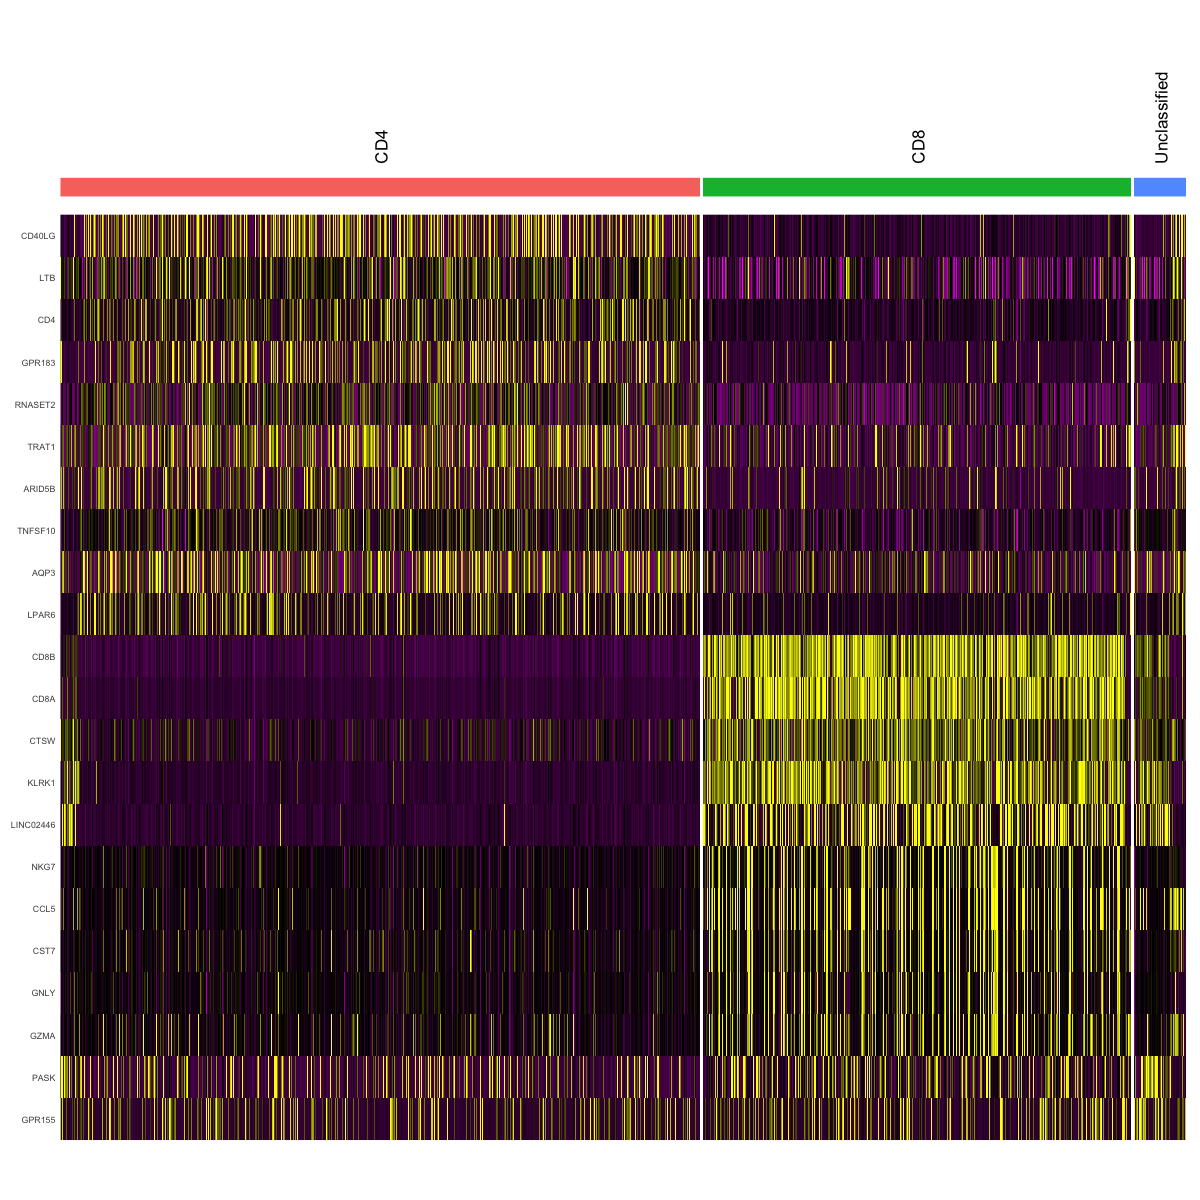

In [ ]:
#Celltype3 CD4 Layer heat map
#subset out Layer 3 CD4
Idents(pbmc10k) = "Celltype2_pred_50" #makes idents refer to column called "Celltype2_pred_50"
pbmc10k_lyr3_cd4 <- subset(pbmc10k, idents="CD4")

#saving active identities to Seurat object to a column called Celltype3_pred_50
Idents(pbmc10k_lyr3_cd4) <- pbmc10k_lyr3_cd4$Celltype3_pred_50

pbmc10k.markers.lyr3.cd4 <- FindAllMarkers(pbmc10k_lyr3_cd4, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
pbmc10k.markers.lyr3.cd4 %>% group_by(cluster) %>% top_n(n = 2, wt = avg_log2FC)
top10_3_cd4 <- pbmc10k.markers.lyr3.cd4 %>% group_by(cluster) %>% top_n(n = 10, wt = avg_log2FC)

png(filename="~/Desktop/pbmc10k_Celltype3_CD4_pred_50_heatmap.png", width=1200, height=1000)
par(mar=c(5,6,4,100)+.1)
DoHeatmap(pbmc10k_lyr3_cd4, features = top10_3_cd4$gene, size = 4, angle=90) + NoLegend()
dev.off()

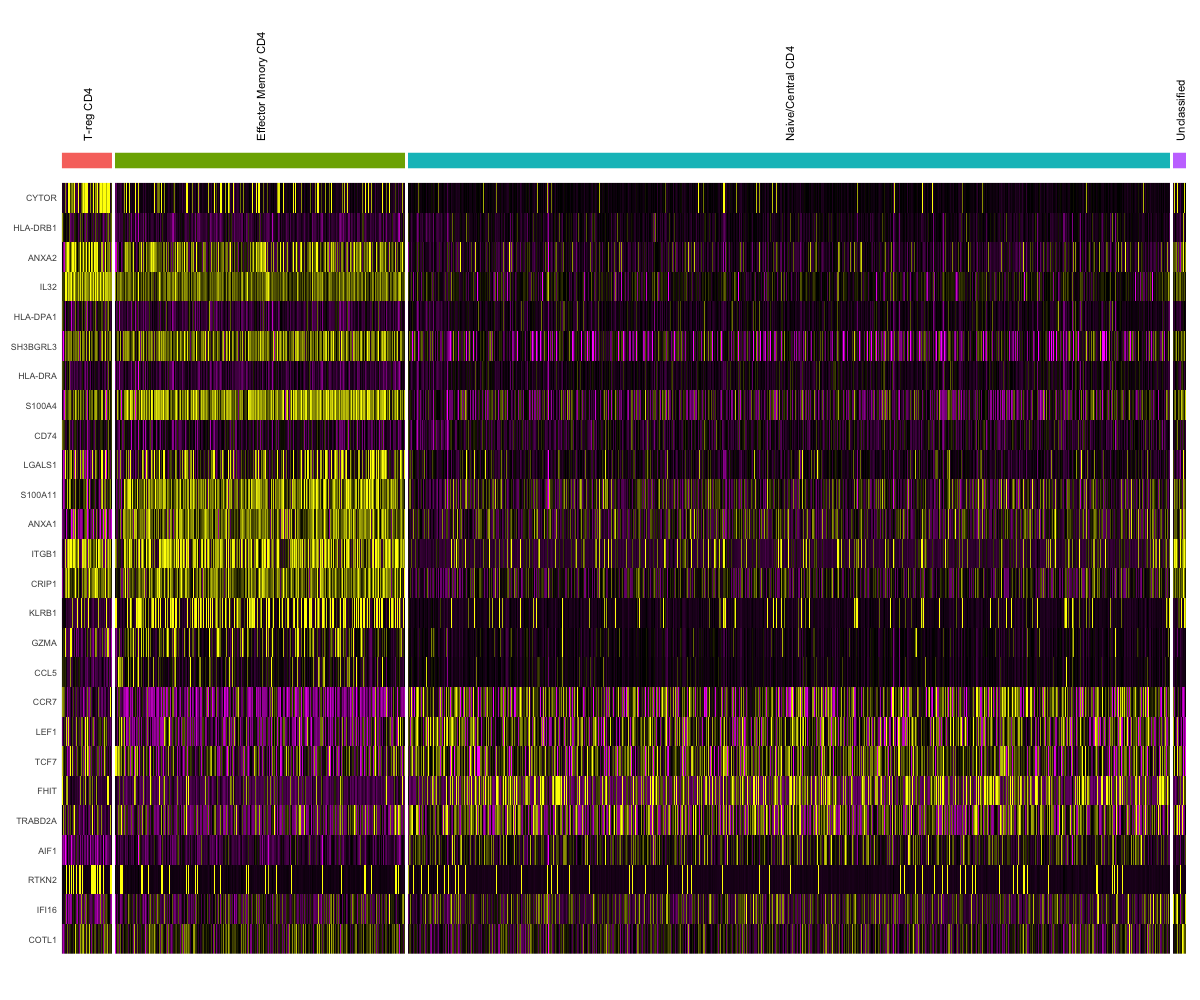

Comparison with heatmap generated when datasets ran with a predictAll rejection cutoff of 0.8:

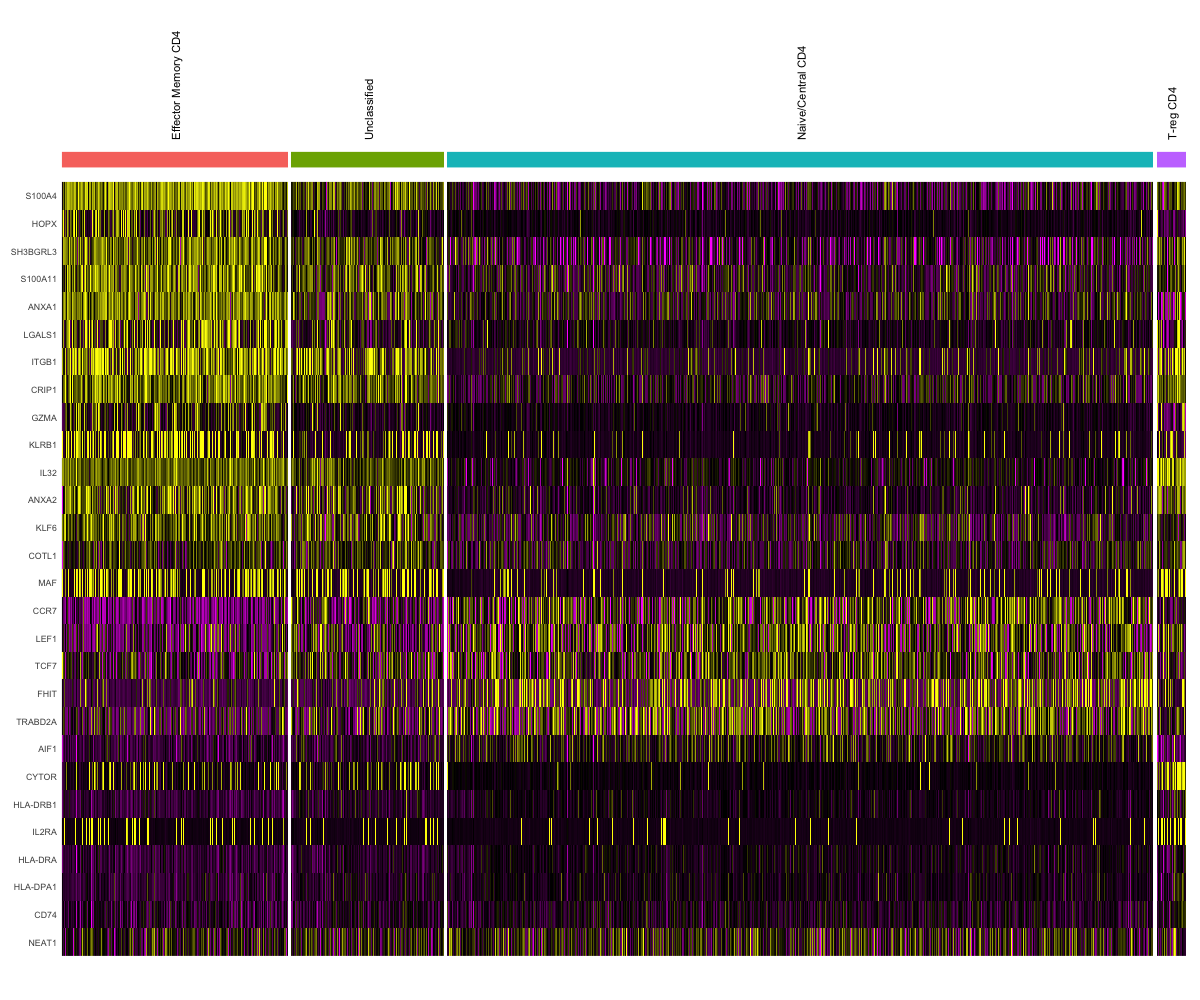

In [ ]:
#Celltype3 CD8 Layer heat map
#subset out Layer 3 CD8
Idents(pbmc10k) = "Celltype2_pred_50" #makes idents refer to column called "Celltype2_pred_50"
pbmc10k_lyr3_cd8 <- subset(pbmc10k, idents="CD8")

#saving active identities to Seurat object to a column called Celltype3_pred_50
Idents(pbmc10k_lyr3_cd8) <- pbmc10k_lyr3_cd8$Celltype3_pred_50

pbmc10k.markers.lyr3.cd8 <- FindAllMarkers(pbmc10k_lyr3_cd8, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
pbmc10k.markers.lyr3.cd8 %>% group_by(cluster) %>% top_n(n = 2, wt = avg_log2FC)
top10_3_cd8 <- pbmc10k.markers.lyr3.cd8 %>% group_by(cluster) %>% top_n(n = 10, wt = avg_log2FC)

png(filename="~/Desktop/pbmc10k_Celltype3_CD8_pred_50_heatmap.png", width=1200, height=1000)
par(mar=c(5,6,4,100)+.1)
DoHeatmap(pbmc10k_lyr3_cd8, features = top10_3_cd8$gene, size = 4, angle=90) + NoLegend()
dev.off()

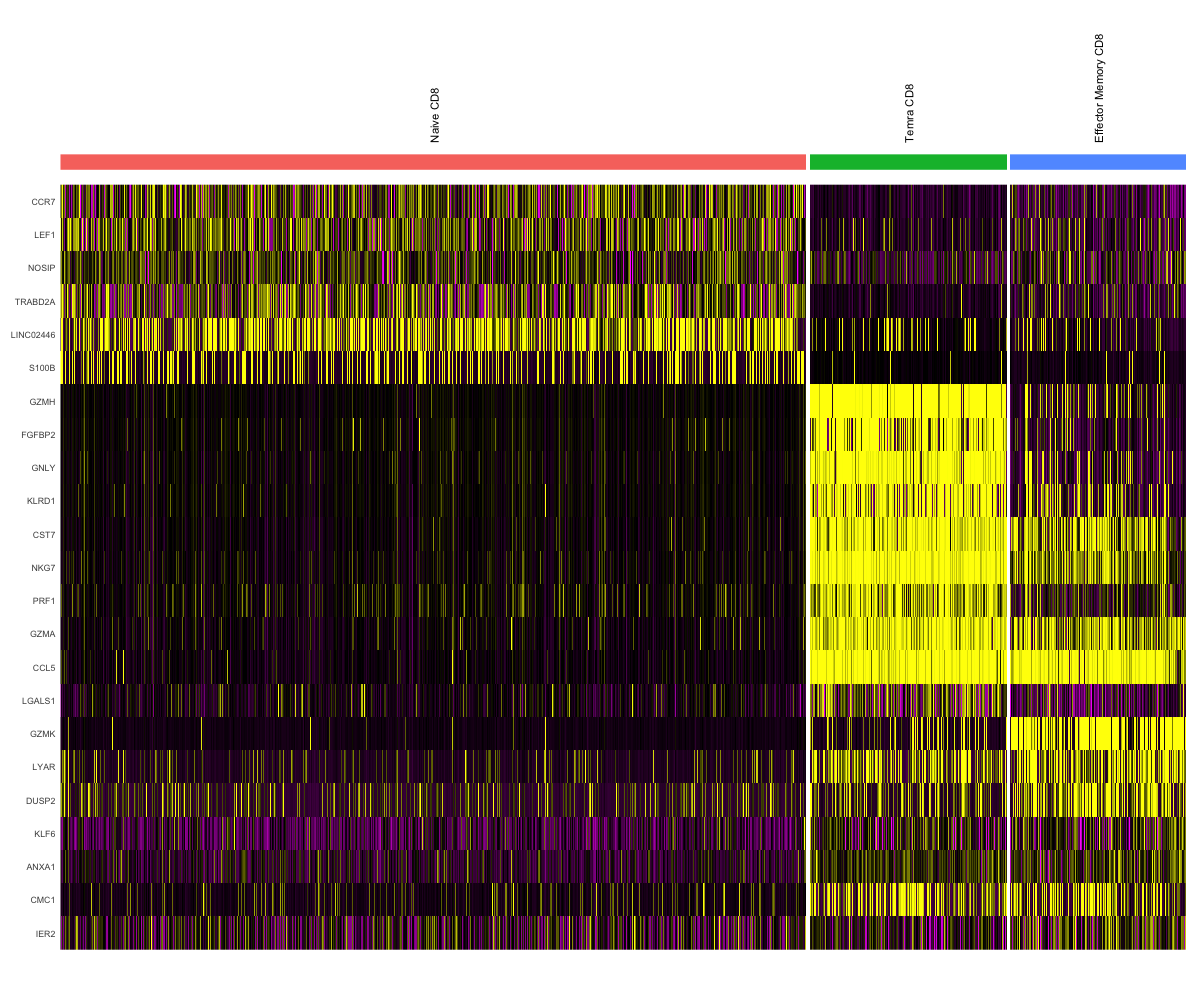

Comparison with heatmap generated when datasets ran with a predictAll rejection cutoff of 0.8:

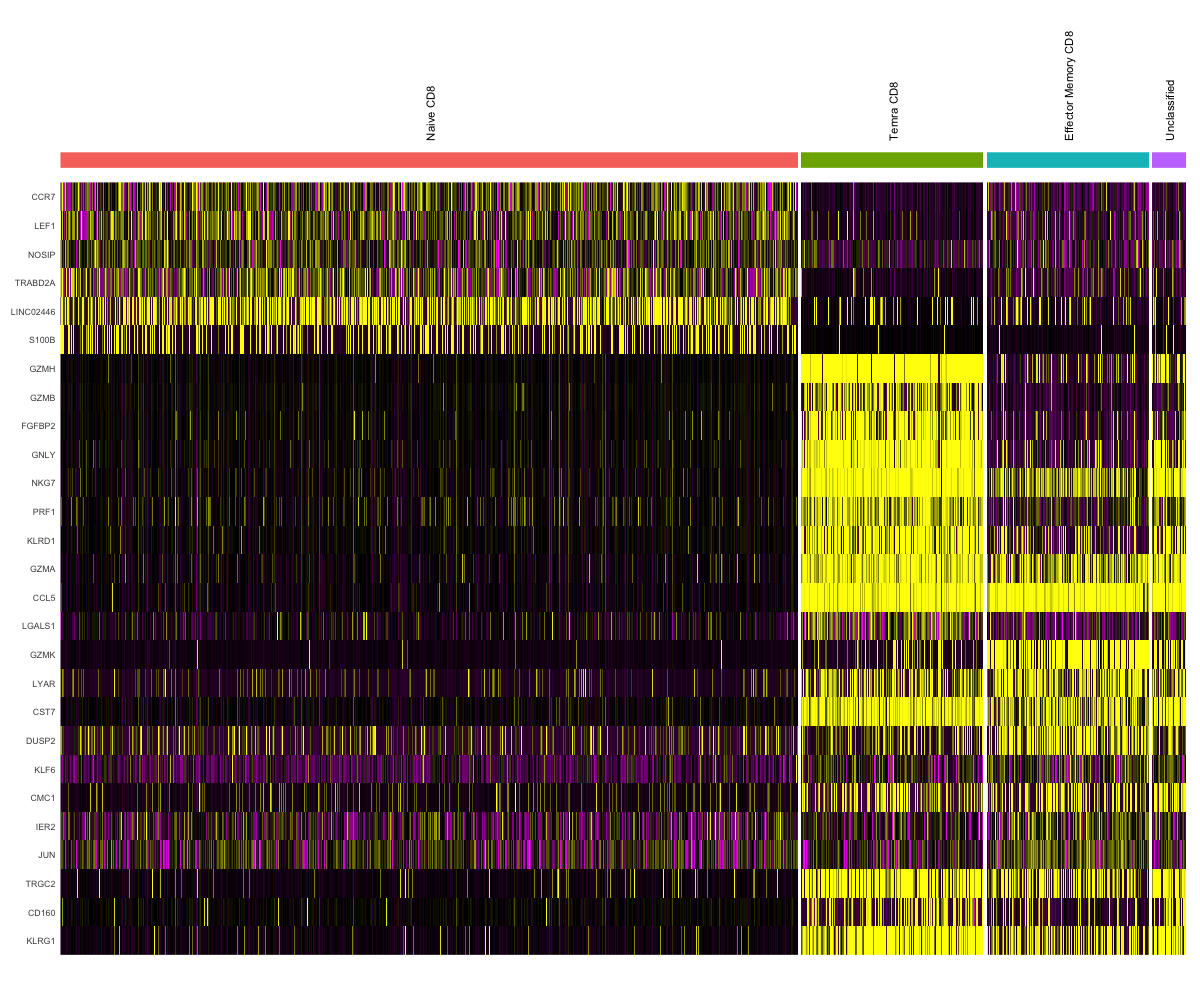

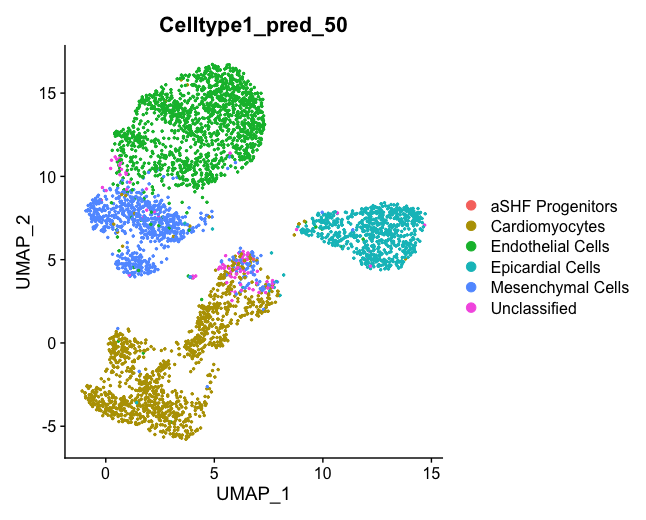

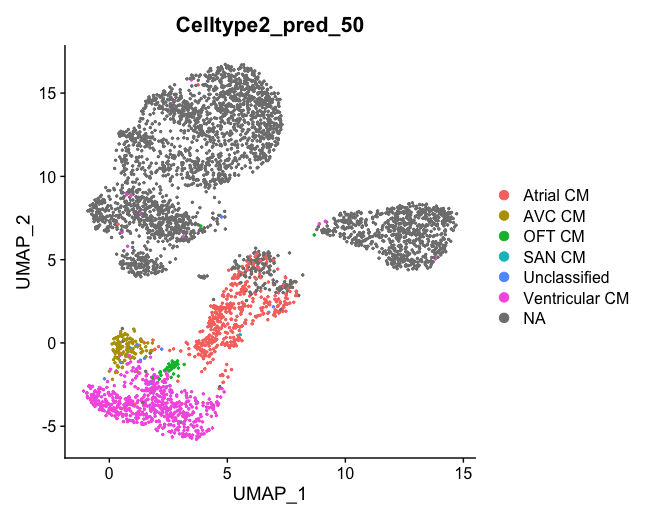

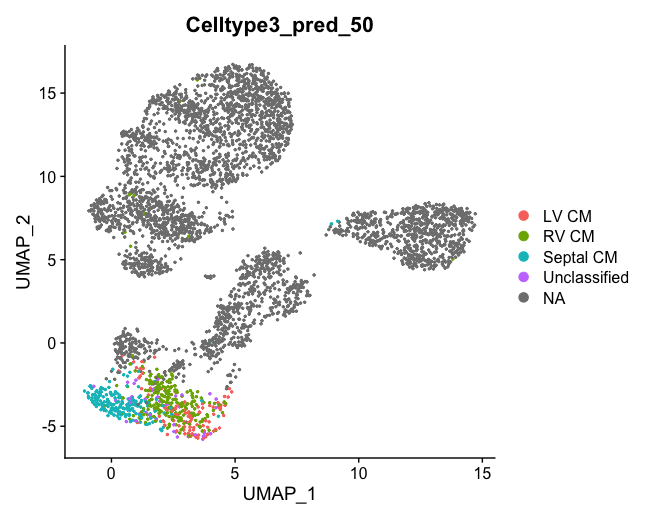

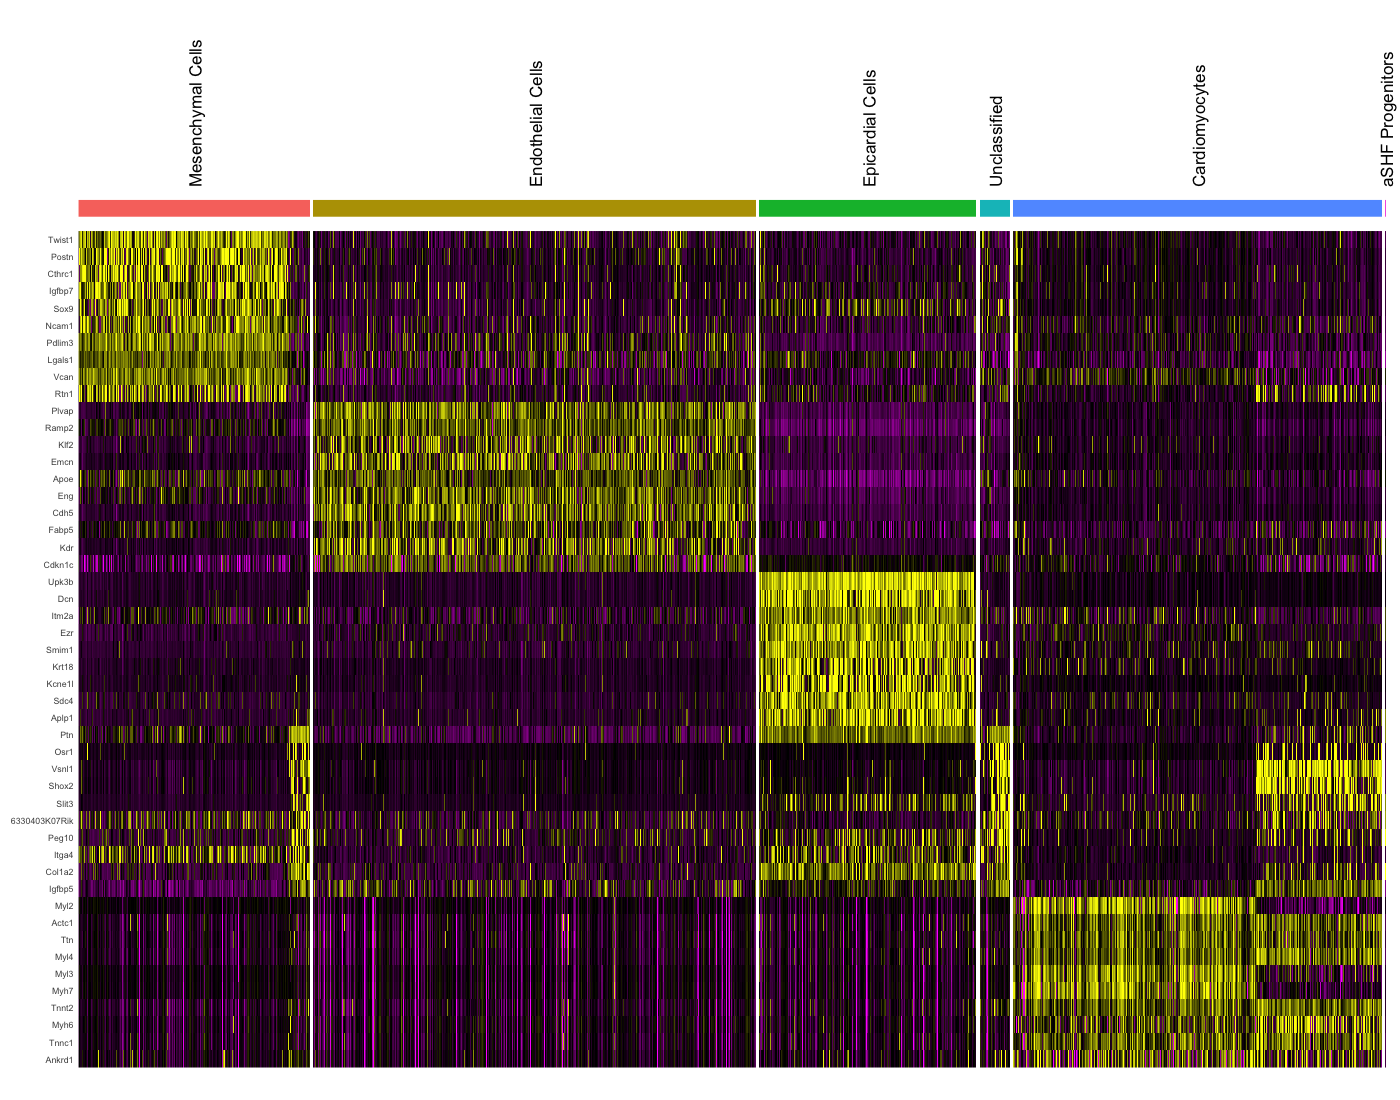

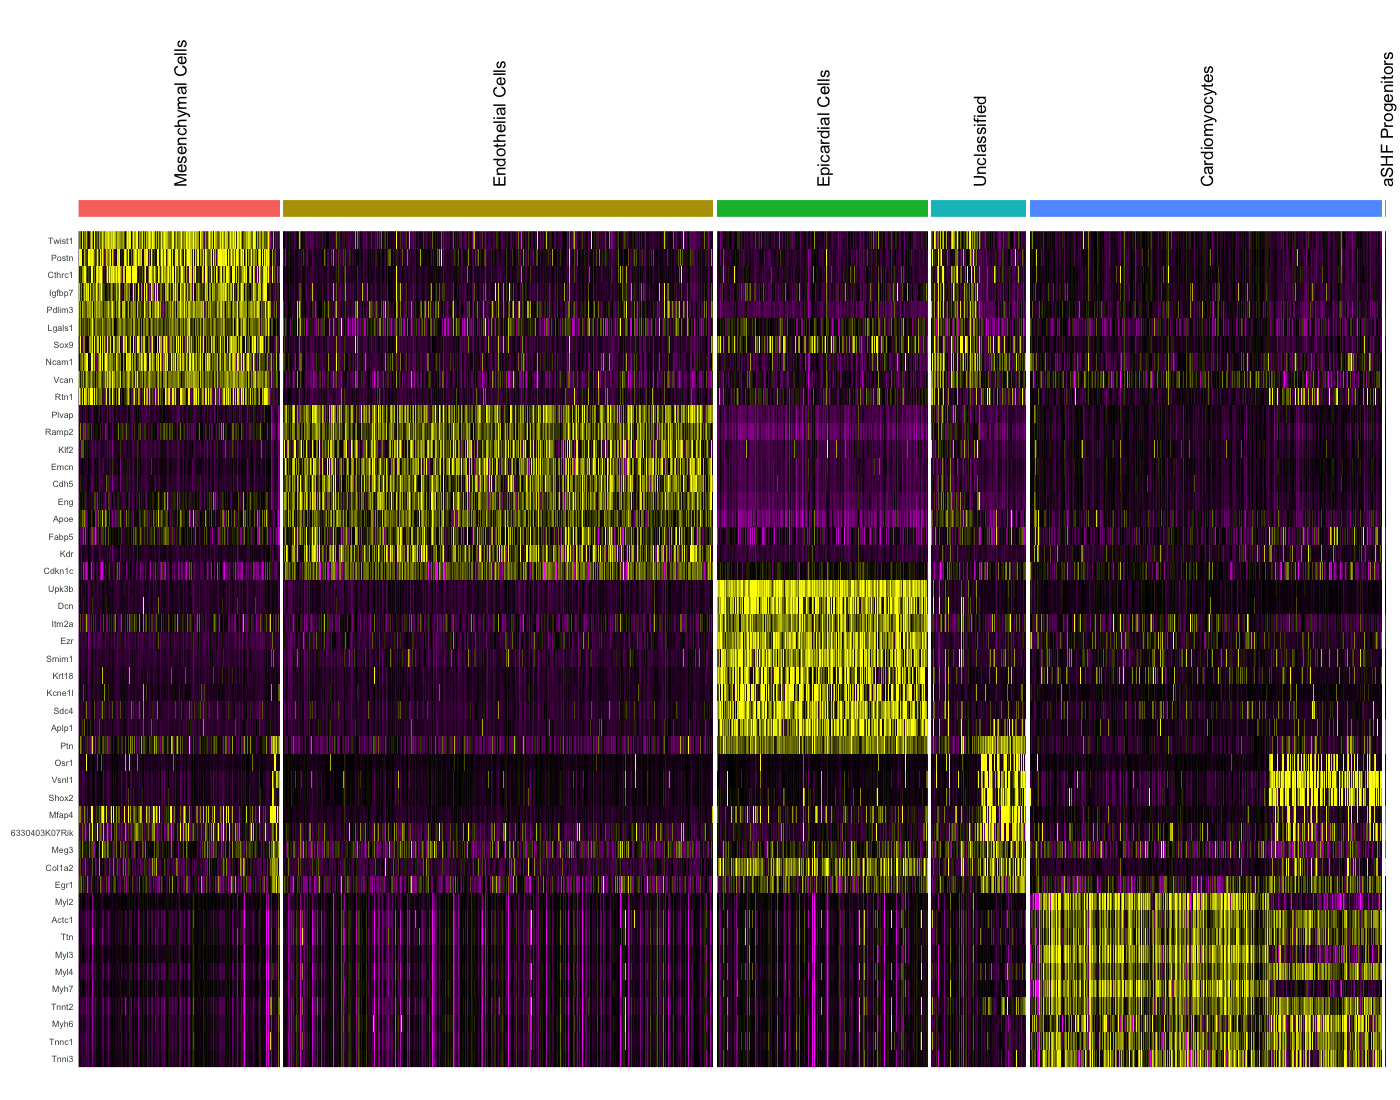

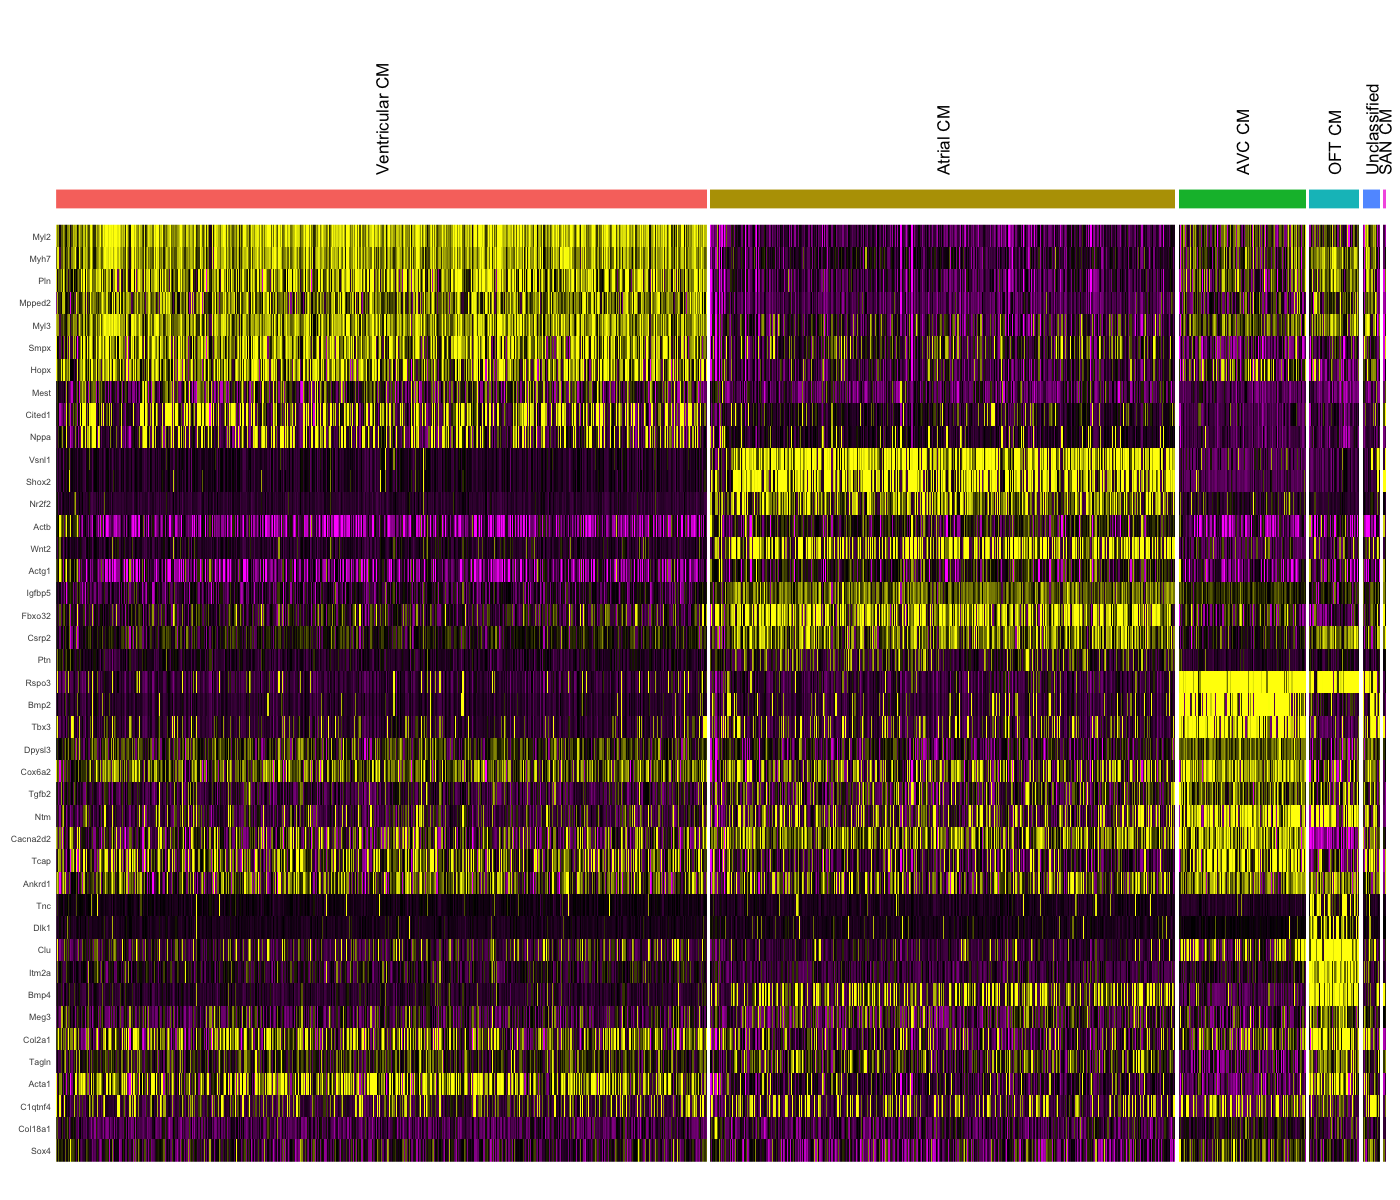

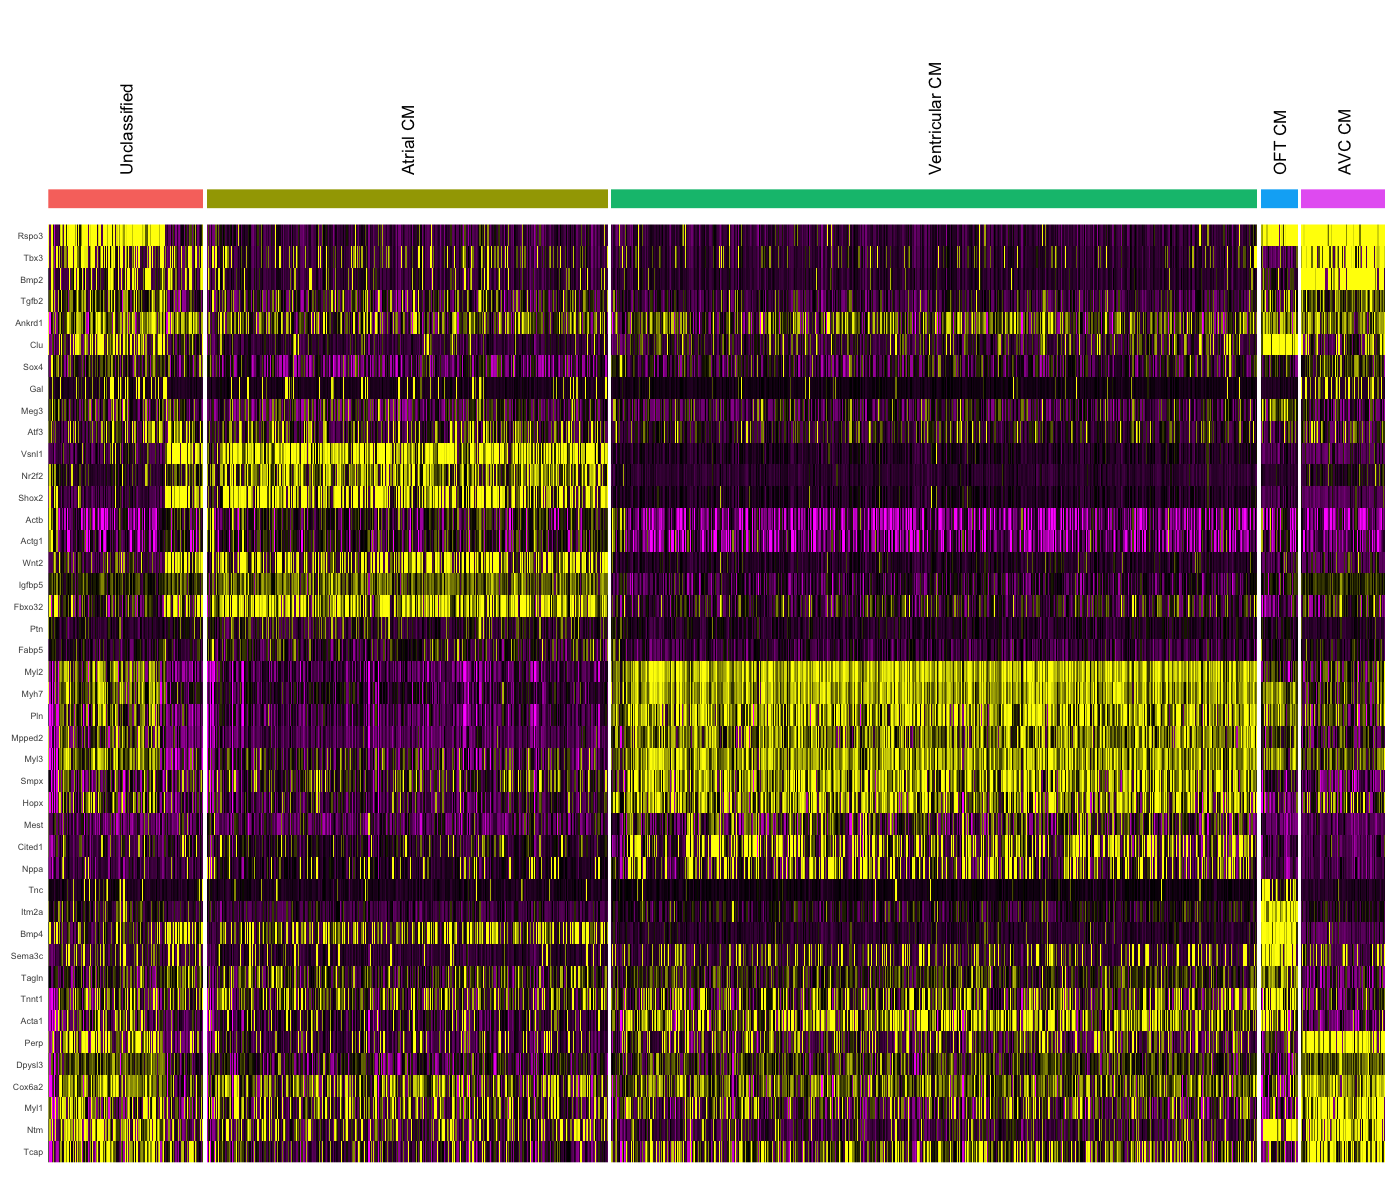

In [ ]:
#layer 3 galdos
Idents(galdos) = galdos$Celltype2_pred_50 
galdos_lyr3 <- subset(galdos, idents="Ventricular CM")

Idents(galdos_lyr3) <- galdos_lyr3$Celltype3_pred_50

galdos.markers.lyr3 <- FindAllMarkers(galdos_lyr3, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
galdos.markers.lyr3 %>% group_by(cluster) %>% top_n(n = 2, wt = avg_log2FC)
top10_3 <- galdos.markers.lyr3 %>% group_by(cluster) %>% top_n(n = 10, wt = avg_log2FC)

png(filename="~/Desktop/galdos_Celltype3_pred_50_heatmap.png", width=1200, height=1000)
par(mar=c(5,6,4,100)+.1)
DoHeatmap(galdos_lyr3, features = top10_3$gene, size = 6, angle=90) + NoLegend()
dev.off()

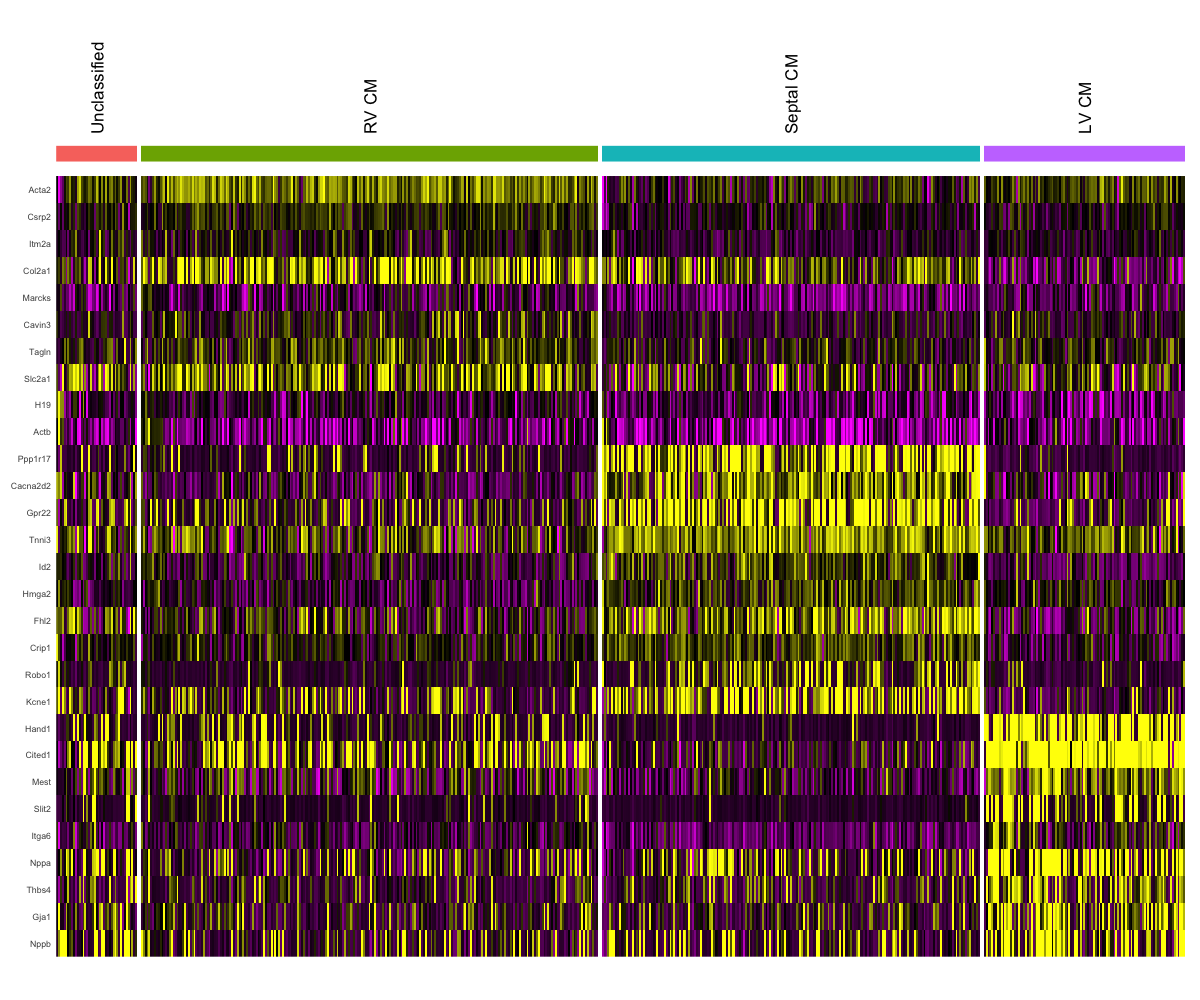

Comparison with heatmap generated when datasets ran with a predictAll rejection cutoff of 0.8:

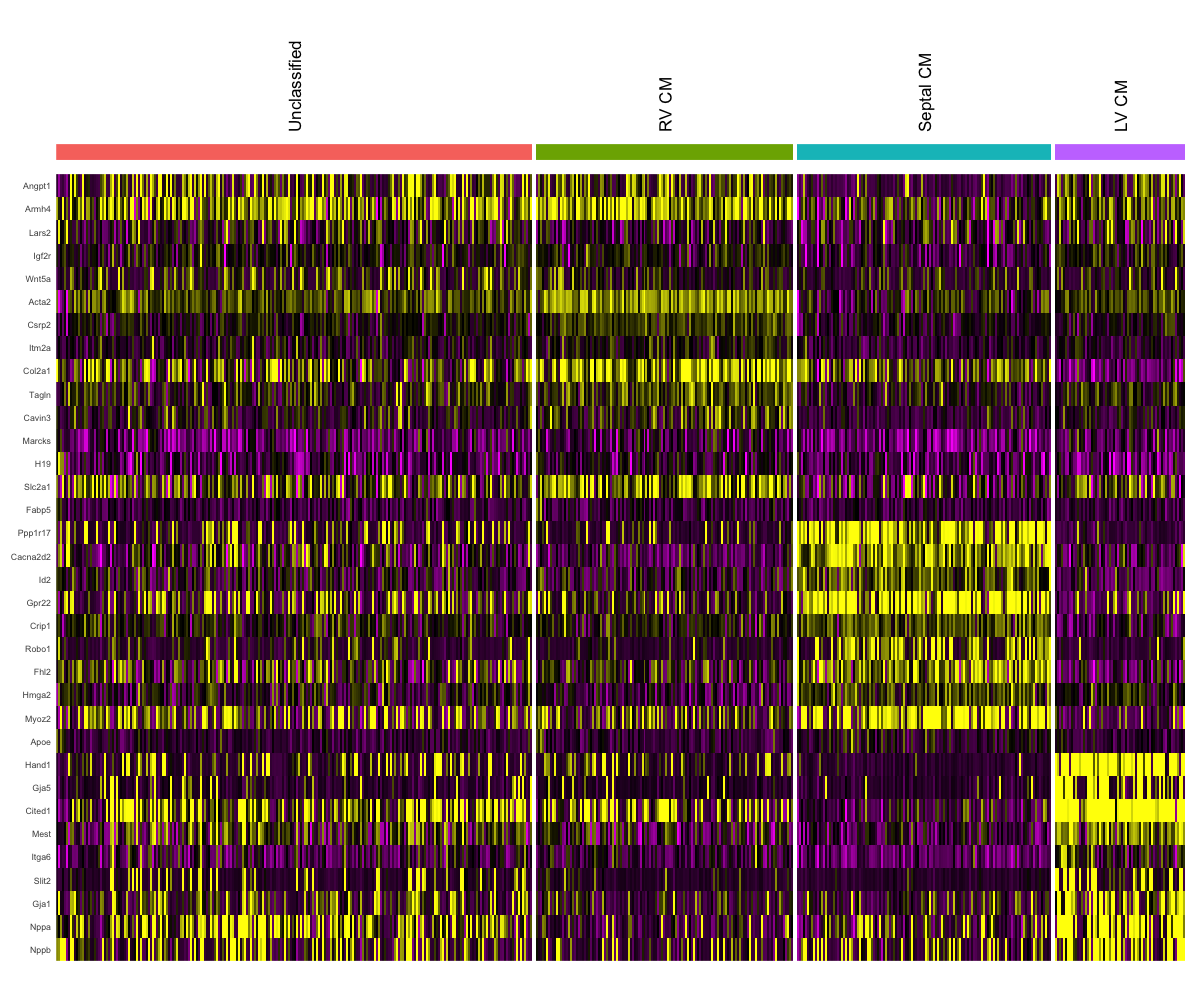

## CellPy Code

### Required dependencies

**NOTE:** Python versions for all training and all predictions must be the same. For instance, all Layer objects must be trained using the same Python version, and prediction of the test dataset must be the same Python version as the one in which the Layer objects were trained.

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import time
import resource 
import sys
import getopt
import os
import datetime
import csv
import pickle
import numpy as np
import pandas as pd
import random
import xgboost as xgb
import matplotlib.pyplot as plt
import itertools
from numpy import interp
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import shap

Ensures given files satisfy one of the possible pathways provided by cellpy

Ensures user input for train or predict matches file inputs

Certain files must appear together for training and/or validation to proceed


In [ ]:
def check_combinations(user_train, user_predict1, user_predict2, user_fr, train_normexpr, labelinfo, train_metadata, testsplit,
                       rejection_cutoff, val_normexpr, val_metadata, layer_paths, frsplit):
    passed = True
    if user_train is None:
        print('ERROR: Run mode must be provided to resume')
        
    # if the user selected the 'trainAll' option
    train_list = [train_normexpr, labelinfo, train_metadata, testsplit, rejection_cutoff]
    if user_train is True:
        print('Training option selected')
        if train_list[0] is None:
            print('ERROR: Normalized expression matrix for training must be provided to resume')
            passed = False
        if train_list[1] is None:
            print('ERROR: Label information file must be provided to resume')
            passed = False
        if train_list[2] is None:
            print('ERROR: Metadata file for training must be provided to resume')
            passed = False
        if train_list[3] is None:
            print('WARNING: Test split amount not provided, training will proceed w/o cross-validation and metric calculations')
        if train_list[4] is None:
            print('ERROR: Rejection cutoff value must be provided to resume')
            passed = False
    
    # if the user selected the 'predictOne' or 'predictAll' options
    predict_list = [val_normexpr, val_metadata, layer_paths, rejection_cutoff]
    if (user_predict1 is True) or (user_predict2 is True):
        if val_metadata is not None and user_predict1 is True:
            print('Independent prediction option with accuracy calculation selected')
        elif val_metadata is not None and user_predict2 is True:
            print('WARNING: Dependent prediction option does not conduct accuracy calculation, provided metadata file will not be used')
        elif val_metadata is None and user_predict1 is True:
            print('Independent prediction option without accuracy calculation selected')
        elif val_metadata is None and user_predict1 is True:
            print('Dependent prediction option selected')
        if predict_list[0] is None:
            print('ERROR: Normalized expression matrix for prediction must be provided to resume')
            passed = False
        if predict_list[2] is None:
            print('ERROR: Path names to Layer objects must be provided to resume')
            passed = False
        if predict_list[3] is None:
            print('ERROR: Rejection cutoff value must be provided to resume')
            passed = False
    
    # if the user selected the 'featureRankingOne' option
    fr_list = [train_normexpr, train_metadata, layer_paths, frsplit]
    if user_fr is True:
        if fr_list[0] is None:
            print('ERROR: Normalized expression matrix for training must be provided to resume')
            passed = False
        if fr_list[1] is None:
            print('ERROR: Metadata file for training must be provided to resume')
            passed = False
        if fr_list[2] is None:
            print('ERROR: Path names to Layer objects must be provided to resume')
            passed = False
        if fr_list[3] is None:
            print('WARNING: Feature ranking split not provided but feature ranking on, will be automatically set to 0.3')
    return passed

Ensures all the user given variables for training exist or are in bounds


In [ ]:
def check_trainingfiles(train_normexpr, labelinfo, train_metadata, testsplit, rejection_cutoff):
    passed = True
    if not os.path.exists(train_normexpr):
        print('ERROR: Given normalized expression data file for training does not exist')
        passed = False
    if not os.path.exists(labelinfo):
        print('ERROR: Given label info file does not exist')
        passed = False
    if not os.path.exists(train_metadata):
        print('ERROR: Given metadata file for training does not exist')
        passed = False
    if testsplit is not None and (testsplit > 1 or testsplit < 0):
        print('ERROR: Given test split percentage must be a value between 0 and 1')
        passed = False
    if rejection_cutoff > 1 or rejection_cutoff < 0:
        print('ERROR: Given rejection cutoff must be a value between 0 and 1')
        passed = False
    return passed

### Training

Conducts training in all layers separated into different folders by name

Creates directory 'training' in cellpy_results folder, defines 'Root' as topmost layer

Conducts finetuning on Root layer with 50 iterations

In [ ]:
def training(train_normexpr, labelinfo, train_metadata, testsplit, rejection_cutoff):
    global path
    path = os.path.join(path, 'training')
    os.mkdir(path)
    os.chdir(path)
    csv2pkl(train_normexpr)
    train_normexpr = train_normexpr[:-3] + 'pkl'
    all_layers = [Layer('Root', 0)]
    construct_tree(labelinfo, all_layers)
    print(all_layers)
    for layer in all_layers:
        path = os.path.join(path, layer.name.replace(' ', ''))
        os.mkdir(path)
        os.chdir(path)
        path = path + '/'
        if layer.name == 'Root': # root top layer
            parameters = layer.finetune(2, testsplit, train_normexpr, train_metadata)
            print(parameters)
        layer.train_layer(train_normexpr, train_metadata, parameters, testsplit, [0, rejection_cutoff])
        os.chdir('..') # return to training directory
        path = os.getcwd()
    path = path + '/'
    training_summary(all_layers)
    export_layers(all_layers)
    print('Training Complete')
    os.chdir('..') # return to cellpy directory
    path = os.getcwd()

Converts the normalized expression csv into a pkl
Expression CSV file must contain genes as row names, samples as column names
First column name (cell A1) is 'gene'

In [ ]:
def csv2pkl(csvpath):
    tp = pd.read_csv(csvpath, iterator=True, chunksize=1000)
    norm_express = pd.concat(tp, ignore_index=True)
    print (norm_express.head())
    norm_express.set_index('gene', inplace=True)
    norm_express.index.names = [None]
    norm_express = norm_express.T
    norm_express.to_pickle(csvpath[:-3] + 'pkl')


Constructs a list of all Layer objects from a labelinfo file
Initalizes each Layer object with a name, level #, and label dictionary

In [ ]:
def construct_tree(labelinfo, all_layers):
    labeldata = fill_data(labelinfo)
    fill_dict(labeldata, all_layers)

Function of construct_tree, fills the vertical columns of the labeldata file


In [ ]:
def fill_data(labelinfo):
    labeldata = list(csv.reader(open(labelinfo, encoding='utf-8-sig')))
    for i in range(1,len(labeldata)):
        if labeldata[i][0]=='':
            labeldata[i][0] = labeldata[i-1][0]
    for i in range(1,len(labeldata)):
        for j in range(1,len(labeldata[0])):
            if labeldata[i][j]=='' and labeldata[i][j-1]==labeldata[i-1][j-1]:
                labeldata[i][j] = labeldata[i-1][j]
    return labeldata

Function of construct_tree after fill_data, reads the edited / filled labeldata file

Constructs the main list structure and initializes all Layer objects in it


In [ ]:
def fill_dict(labeldata, all_layers):
    for i in range(len(labeldata)):
        # Fills the root dictionary
        if find_layer(all_layers, labeldata[i][0]) is None:
            root_layer = find_layer(all_layers, 'Root')
            root_layer.add_dictentry(labeldata[i][0])
        # Fills dictionaries in other layers given the existence of a leaf
        for j in range(1,len(labeldata[0])):
            if labeldata[i][j]!='':
                if find_layer(all_layers, labeldata[i][j-1]) is None:
                    all_layers.append(Layer(labeldata[i][j-1], j))
                prev_layer = find_layer(all_layers, labeldata[i][j-1])
                prev_layer.add_dictentry(labeldata[i][j])
            else:
                break


Utility function of fill_dict, searches all_layers for a layer with the given name

In [ ]:
def find_layer(all_layers, name):
    for layer in all_layers:
        if layer.name == name:
            return layer
    return None

Summarizes and lists the path names of all the files created during training
Prints the summary of each Layer object

In [ ]:
def training_summary(all_layers):
    f = open(path + 'training_summaryfile.txt', 'w')
    for layer in all_layers:
        f.write(str(layer))
        f.write('\n')


Exports all the trained Layers as pickle files

In [ ]:
def export_layers(all_layers):
    for layer in all_layers:
        with open(path + layer.name + '_object.pkl', 'wb') as output:
            pickle.dump(layer, output, pickle.HIGHEST_PROTOCOL)


### Prediction

Ensures all the user given variables for validation exist / are in the correct format


In [ ]:
def check_predictionfiles(layer_paths, val_normexpr, val_metadata=None):
    passed = True
    # check all layer paths are objects and contain a trained xgb model
    for i in range(len(layer_paths)):
        layer_path = layer_paths[i]
        if not os.path.exists(layer_path):
            print('ERROR: Given Layer object ' + str(i) + ' does not exist')
            passed = False
        else:
            layer = pd.read_pickle(layer_path)
            if layer.trained() is False:
                print('ERROR: Given Layer object ' + str(i) + ' is not trained')
                passed = False
    if not os.path.exists(val_normexpr):
        print('ERROR: Given validation normalized expression data file for prediction does not exist')
        passed = False
    if val_metadata != None and not os.path.exists(val_metadata):
        print('ERROR: Given validation metadata file for prediction does not exist')
        passed = False
    return passed

Conducts prediction in specified layers separated into different folders by name

Creates directory 'predictionOne' in cellpy_results folder, defines 'Root' as topmost layer

In [ ]:
def prediction1(val_normexpr, val_metadata, object_paths):
    global path
    path = os.path.join(path, 'predictionOne')
    os.mkdir(path)
    os.chdir(path)
    all_layers = import_layers(object_paths)
    featurenames = all_layers[0].xgbmodel.feature_names
    reorder_pickle(val_normexpr, featurenames)
    val_normexpr = val_normexpr[:-3] + 'pkl'
    for layer in all_layers:
        path = os.path.join(path, layer.name.replace(' ', ''))
        os.mkdir(path)
        os.chdir(path)
        path = path + '/'
        layer.predict_layer([0, rejection_cutoff], val_normexpr, val_metadata)
        os.chdir('..') # return to prediction directory
        path = os.getcwd()
    print('Prediction Complete')
    os.chdir('..') # return to cellpy directory
    path = os.getcwd()

Conducts prediction in all layers in one folder

Creates directory 'predictionAll' in cellpy_results folder, defines 'Root' as topmost layer

In [ ]:
def prediction2(val_normexpr, object_paths):
    global path
    path = os.path.join(path, 'predictionAll')
    os.mkdir(path)
    os.chdir(path)
    path = path + '/'
    
    all_layers = import_layers(object_paths)
    print(all_layers)
    featurenames = all_layers[0].xgbmodel.feature_names
    reorder_pickle(val_normexpr, featurenames)
    val_normexpr = val_normexpr[:-3] + 'pkl'
    
    norm_express = pd.read_pickle(val_normexpr)
    feature_names = list(norm_express)
    print(norm_express.shape)
    X = norm_express.values
    
    X = norm_express.values
    norm_express.index.name = 'cells'
    norm_express.reset_index(inplace=True)
    Y = norm_express.values
    all_cellnames = Y[:,0]
    all_cellnames = all_cellnames.ravel()
    Y = None
    
    f = open(path + 'predictionall_reject' + str(rejection_cutoff) + '.csv','w')
    for i in range(len(all_cellnames)):
        sample = np.array(X[i])#.reshape((-1,1))
        sample = np.vstack((sample, np.zeros(len(feature_names))))
        d_test = xgb.DMatrix(sample, feature_names=feature_names)
        root_layer = find_layer(all_layers, 'Root')
        root_layer.add_dictentry('Unclassified')
        probabilities_xgb = root_layer.xgbmodel.predict(d_test)
        predictions_xgb = probabilities_xgb.argmax(axis=1)
        if probabilities_xgb[0,probabilities_xgb.argmax(axis=1)[0]] < rejection_cutoff:
            predictions_xgb[0] = len(root_layer.labeldict)-1
        f.write(all_cellnames[i])
        f.write(',')
        f.write(root_layer.labeldict[predictions_xgb[0]])
        
        search_str = root_layer.labeldict[predictions_xgb[0]]
        del root_layer.labeldict[len(root_layer.labeldict)-1]
        while(True):
            curr_layer = find_layer(all_layers, search_str)
            if curr_layer is not None:
                curr_layer.add_dictentry('Unclassified')
                probabilities_xgb = curr_layer.xgbmodel.predict(d_test)
                predictions_xgb = probabilities_xgb.argmax(axis=1)
                if probabilities_xgb[0,probabilities_xgb.argmax(axis=1)[0]] < rejection_cutoff:
                    predictions_xgb[0] = len(curr_layer.labeldict)-1
                f.write(',')
                f.write(curr_layer.labeldict[predictions_xgb[0]])
                search_str = curr_layer.labeldict[predictions_xgb[0]]
                del curr_layer.labeldict[len(curr_layer.labeldict)-1]
            else:
                break
        f.write('\n')
    f.close()
    
    print('Prediction Complete')
    os.chdir('..') # return to cellpy directory
    path = os.getcwd()

Imports Layer objects from a list of given paths

In [ ]:
def import_layers(layer_paths):
    layers = []
    for layer_path in layer_paths:
         layer = pd.read_pickle(layer_path)
         layers.append(layer)
    return layers


Converts the normalized expression csv into a pkl

Expression CSV file must contain genes as row names, samples as column names

First column name (cell A1) is 'gene'

Reorders the csv file to match the features in a given featurenames list

Returns path to the new pkl file

In [ ]:
def reorder_pickle(csvpath, featurenames):
    tp = pd.read_csv(csvpath, iterator=True, chunksize=1000)
    norm_express = pd.concat(tp, ignore_index=True)
    print (norm_express.head())
    norm_express.set_index('gene', inplace=True)
    norm_express.index.names = [None]
    norm_express = norm_express.T
    print(norm_express.T.duplicated().any())
    print ('Training Data # of  genes: ' + str(len(featurenames)))
    
    ## Manually reorder columns according to training data index
    # Reorder overlapping genes, remove genes not in training data
    origfeat = list(norm_express)
    print ('Validation Data # of genes: ' + str(len(origfeat)))
    newindex = []
    for i in range(len(featurenames)):
        if featurenames[i] in origfeat:
            newindex.append(featurenames[i])
    print ('Overlapping # of genes: ' + str(len(newindex)))
    norm_express = norm_express.reindex(columns=newindex)
    # Add missing features, remove extra features to match atlas
    i = 0
    missing_counter = 0
    while i < len(list(norm_express)):
        if list(norm_express)[i] != featurenames[i]:
            norm_express.insert(i, featurenames[i], None)
            missing_counter += 1
        i += 1
    while i < len(featurenames):
        norm_express.insert(i, featurenames[i], None)
        i += 1
        missing_counter += 1
    # Overlapping + missing = training total
    print ('Missing # of genes: ' + str(missing_counter))
    norm_express.to_pickle(csvpath[:-3] + 'pkl')

### Feature Ranking

Ensures all the user given variables for training exist or are in bounds

In [ ]:
def check_featurerankingfiles(train_normexpr, train_metadata, layer_paths, frsplit):
    passed = True
    if not os.path.exists(train_normexpr):
        print('ERROR: Given normalized expression data file for training does not exist')
        passed = False
    if not os.path.exists(train_metadata):
        print('ERROR: Given metadata file for training does not exist')
        passed = False
    # check all layer paths are objects and contain a trained xgb model
    if layer_paths != None:
        for i in range(len(layer_paths)):
            layer_path = layer_paths[i]
            if not os.path.exists(layer_path):
                print('ERROR: Given Layer object ' + str(i) + ' does not exist')
                passed = False
            else:
                layer = pd.read_pickle(layer_path)
                if layer.trained() is False:
                    print('ERROR: Given Layer object ' + str(i) + ' is not trained')
                    passed = False
    if frsplit is not None and (frsplit > 1 or frsplit < 0):
        print('ERROR: Given feature ranking split must be a value between 0 and 1')
        passed = False
    return passed


Conducts prediction in all layers separated into different folders by name

Creates directory 'featureranking' in cellpy_results folder, defines 'Root' as topmost layer


In [ ]:
def featureranking(train_normexpr, train_metadata, object_paths, frsplit):
    global path
    path = os.path.join(path, 'featureranking')
    os.mkdir(path)
    os.chdir(path)
    csv2pkl(train_normexpr)
    train_normexpr = train_normexpr[:-3] + 'pkl'
    all_layers = import_layers(object_paths)
    for layer in all_layers:
        path = os.path.join(path, layer.name.replace(' ', ''))
        os.mkdir(path)
        os.chdir(path)
        path = path + '/'
        layer.featurerank_layer(train_normexpr, train_metadata, frsplit)
        os.chdir('..') # return to prediction directory
        path = os.getcwd()
    print('Feature Ranking Complete')
    os.chdir('..') # return to cellpy directory
    path = os.getcwd()

### Layer Class

Object for each layer of the model
Contains methods for subsetting data according to the metadata and label info files,
                     - dividing subsetted data 90-10 and 10 fold cv,
                     - finetuning and training each layer, calculating metrics and SHAP feature ranking,
                     - outputting final model for validation
Keeps track of all outputted files, stores paths and names in instance variables


In [ ]:
class Layer:
    
    # level is the column of the metadata file in which the name of the layer appears
    # xgbmodel is a trained XGBoost classifier object
    # cvmetrics, finalmetrics, cfm, pr are path names to those files
    # predictions, roc, fr are lists of path names
    def __init__(self, name, level, labeldict=None, xgbmodel=None, finetuning=None, cvmetrics=None,
                 finalmetrics=None, predictions=None, cfm=None, roc=None, pr=None, pickle=None):
        self.name = name
        self.level = level
        self.labeldict = {}
        self.xgbmodel = None
        self.finetuning = None
        self.cvmetrics = None
        self.finalmetrics = None
        self.predictions = []
        self.cfm = None
        self.roc = []
        self.pr = None
        self.pickle = self.name + '_object.pkl'
    
    def __hash__(self):
        return hash(self.name)
    
    def __eq__(self, layer2):
        return self.name==layer2.name
    
    def __repr__(self):
        return "<Layer: '%s', Level: %s, labeldict: %s, Trained: %s>" % (self.name, self.level, self.labeldict, self.trained())
    
    def __str__(self):
        return_str = 'Object: ' + self.pickle + '\n'
        return_str += 'Layer: ' + self.name + '\n'
        return_str += 'Level: ' + str(self.level) + '\n'
        return_str += 'Label Dictionary: ' + str(self.labeldict) + '\n'
        if self.finetuned():
            return_str += 'Finetuning Log: ' + self.finetuning + '\n'
        if self.trained():
            return_str += 'XGB Model: ' + self.name + '_xgbmodel.sav' + '\n'
            if self.cvmetrics is not None:
                return_str += '10-Fold Cross Validation Metrics: ' + self.cvmetrics + '\n'
                return_str += 'Final Metrics (10%): ' + self.finalmetrics + '\n'
                return_str += 'Predictions (no rejection): ' + self.predictions[0] + '\n'
                return_str += 'Predictions (' + str(rejection_cutoff) + ' rejection cutoff): ' + self.predictions[1] + '\n'
                return_str += 'Confusion Matrix (10%, no rejection): ' + self.cfm + '\n'
                return_str += 'Micro/Macro ROC Curves: ' + self.roc[0] + '\n'
                return_str += 'Per-Class ROC Curves: ' + self.roc[1] + '\n'
                return_str += 'All Combined ROC Curves: ' + self.roc[2] + '\n'
                return_str += 'Precision-Recall Graph (10%, no rejection): ' + self.pr + '\n'
        return return_str
    
    def finetuned(self):
        return self.finetuning is not None
    
    def trained(self):
        return self.xgbmodel is not None
    
    # Adds a value to the label dictionary if it is not already present
    # Utility function of fill_dict
    def add_dictentry(self, value):
        if value not in list(self.labeldict.values()):
            self.labeldict[len(self.labeldict)] = value


    # Hyperparameter tuning for XGBoost using accuracy
    # Equivalent to sklearn.model_selection.RandomizedSearchCV -- w/o cv and w/ triangular dist
    # Parameters: eta, max_depth, subsamaple, colsample_bytree
    # n randomized trials: triangular distribution around the default or recommended xgboost value
    #                      rounded to a reasonable decimal place
    # Splits data according to user-provided testplit value, NO cross validation conducted
    # Returns parameters with lowest mean absolute error (mae) on 10% for actual training
    # Outputs csv file with accuracy of each class and mae for all trials, does not output any other metrics
    def finetune(self, trials, testsplit, normexprpkl, metadatacsv):
        # If user skips cross validation, testsplit automatically set to 10% for finetuning
        if testsplit is None:
            testsplit = 0.1
        X, Y, X_tr, X_test, Y_tr, Y_test, _ = self.read_data(normexprpkl, metadatacsv, testsplit)
        min_mae = 100000000000000
        f = open(path + self.name + '_finetuning.csv', 'a+')
        f.write('ETA,Max Depth,Subsample,Colsample by Tree,')
        for i in range(len(self.labeldict)):
            f.write(self.labeldict[i] + ' Accuracy')
            f.write(',')
        f.write('MAE\n')
        for i in range(trials):
            eta_temp = round(random.triangular(0,1,0.3),1)
            max_depth_temp = round(random.triangular(4,8,6))
            subsample_temp = round(random.triangular(0.01,1,0.5),1)
            colsample_bytree_temp = round(random.triangular(0.01,1,0.5),1)
            params = {'objective': 'multi:softprob', 'eta': eta_temp, 'max_depth': max_depth_temp, 'subsample': subsample_temp,
                    'colsample_bytree': colsample_bytree_temp, 'eval_metric': 'merror', 'seed': 840}
    
            mae, output_string = self.xgboost_model_shortver(X_tr, X_test, Y_tr, Y_test, params)
            f.write(str(eta_temp) + ',' + str(max_depth_temp) + ',' + str(subsample_temp) + ',' + str(colsample_bytree_temp) + ',')
            f.write(output_string + '\n')
            if mae < min_mae:
                min_mae = mae
                final_params = params
        print(final_params)
        self.finetuning = self.name + '_finetuning.csv'
        return final_params

    # XGBoost w/o cross validation, no output files, just accuracy score on user-provided testsplit value
    # Returns mean absolute error (mae) as float and csv output string
    #       Accuracy for each class and mae in a comma-separated string for classification
    # Only for finetuning!
    def xgboost_model_shortver(self, X_tr, X_test, Y_tr, Y_test, params):
        params['num_class'] = len(self.labeldict)
    
        d_tr = xgb.DMatrix(X_tr, Y_tr, feature_names=feature_names)
        model = xgb.train(params, d_tr, 20, verbose_eval=10)
        d_test = xgb.DMatrix(X_test, Y_test, feature_names=feature_names)
        probabilities_xgb = model.predict(d_test)
    
        returned_str = ''
        predictions_xgb = probabilities_xgb.argmax(axis=1)
        cm = confusion_matrix(Y_test, predictions_xgb)
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        mae = 1-sum(cm.diagonal())/len(cm.diagonal())
        returned_str = ','.join(map(str, cm.diagonal())) + ',' + str(mae)
        return mae, returned_str
    
    
    # Trains one layer in the classification
    # Trains XGBoost for a layer of classification given parameters
    # Splits data according to user-provided testsplit
    # Conducts 10-fold cross validation on (1-testsplit)% of data, outputs cv metrics
    # Retrains model on (1-testsplit)% to output metrics when tested on holdout (testsplit)%
    # Retrains final saved model on 100% of data, returns for feature ranking
    # Conducts feature ranking with SHAP if instructed by user on full final model
    def train_layer(self, normexprpkl, metadatacsv, params, testsplit, rejectcutoffs):
        params['num_class'] = len(self.labeldict)
    
        if testsplit is not None:
            # 10-fold CV on (1-testsplit)% of data
            X, Y, X_tr, X_test, Y_tr, Y_test, test_cellnames = self.read_data(normexprpkl, metadatacsv, testsplit)
            kfold = 10
            sss = StratifiedShuffleSplit(n_splits=kfold, test_size=0.1, random_state=720)
            for i, (train_index, test_index) in enumerate(sss.split(X_tr, Y_tr)):
                print('[Fold %d/%d]' % (i + 1, kfold))
                X_train, X_valid = X_tr[train_index], X_tr[test_index]
                Y_train, Y_valid = Y_tr[train_index], Y_tr[test_index]
                d_train = xgb.DMatrix(X_train, Y_train, feature_names=feature_names)
                cv_model = xgb.train(params, d_train, 20, verbose_eval=500)
                self.xgbmodel = cv_model # temporarily set xgbmodel to cv 0.9*(1-testsplit)% model
                self.model_metrics('cv', rejectcutoffs[1], X_valid, Y_valid)
                self.cvmetrics = self.name + '_cvmetrics.txt'
        
            # 90% model, 10% testing
            d_tr = xgb.DMatrix(X_tr, Y_tr, feature_names=feature_names)
            temp_model = xgb.train(params, d_tr, 20, verbose_eval=500)
            self.xgbmodel = temp_model # temporarily set xgbmodel to (1-testsplit)% model
            self.model_metrics('final', rejectcutoffs[1], X_test, Y_test)
            self.finalmetrics = self.name + '_finalmetrics.txt'
            self.cell_predictions('training', rejectcutoffs, test_cellnames, X_test, Y_test)
            for cutoff in rejectcutoffs:
                self.predictions.append(self.name + '_trainingpredictions_reject' + str(cutoff) + '.csv')
            self.cfsn_mtx('training', rejectcutoffs[1], X_test, Y_test)
            self.cfm = self.name + '_confusionmatrix.svg'
            self.roc_curves(X_test, Y_test)
            self.roc.append(self.name + '_miacroroc.svg')
            self.roc.append(self.name + '_classroc.svg')
            self.roc.append(self.name + '_allroc.svg')
            self.pr_curves(X_test, Y_test)
            self.pr = self.name + '_allpr.svg'
    
        # skip cross validation and metric calculations
        if testsplit is None:
            X, Y, all_cellnames = self.read_data(normexprpkl, metadatacsv)
        
        # final 100% model
        d_all = xgb.DMatrix(X, Y, feature_names=feature_names)
        final_model = xgb.train(params, d_all, 20, verbose_eval=500)
        pickle.dump(final_model, open(path + self.name + '_xgbmodel.sav', 'wb'))
        self.xgbmodel = final_model
    
    
    # Outputs predictions of the 90% model on the 10% test set in a given dataset
    # 1 csv file outputted for each rejection cutoff in the list rejectioncutoffs
    # A cutoff of 0.5 means the probability of the label must be >=0.5 for a prediction to be called
    # A cutoff of 0 is equivalent to no rejection option
    def predict_layer(self, rejectcutoffs, normexprpkl, metadatacsv=None):
        X, Y, all_cellnames = self.read_data(normexprpkl, metadatacsv) # Y will be None if metadatacsv=None
        self.cell_predictions('validation', rejectcutoffs, all_cellnames, X, Y) # can handle Y=None
        if metadatacsv != None:
            self.cfsn_mtx('validation', rejectcutoffs[1], X, Y)
            self.model_metrics('validation', rejectcutoffs[1], X, Y)


    # Outputs SHAP feature ranking plots overall and for each class
    # Outputs csv table containing overall SHAP values
    # Uses same procedure for subsetting norm_expr as read_data(...) if column & criterium are provided
    # frsplit automatically set to 0.3 if not provided
    def featurerank_layer(self, normexprpkl, metadatacsv, frsplit):
        norm_express = pd.read_pickle(normexprpkl)
        tp = pd.read_csv(metadatacsv, iterator=True, chunksize=1000)
        labels = pd.concat(tp, ignore_index=True)
        labels.set_index('Unnamed: 0', inplace=True)
        labels.index.names = [None]
        # Only root level will have no subsetcolumn, all other levels require subsetting
        # self.level is one less than what user sees since cellname column is dropped above
        metadata_columns = list(labels.columns.values)
        labelcolumn = metadata_columns[self.level]
        subsetcolumn = metadata_columns[self.level-1] if self.level > 0 else None
        subsetcriterium = self.name
        # Filter out cells if subsetting necessary, keep only data from given criterium
        if subsetcolumn != None:
            # Reindex norm_express and labels based on cell names in given criterium
            temp = labels.loc[labels[subsetcolumn] == subsetcriterium]
            labels = labels.reindex(index=temp.index)
            norm_express = norm_express.reindex(index=temp.index)
        # Remove cells with labels not provided in the dictionary
        temp = labels.loc[labels[labelcolumn].isin(list(self.labeldict.values()))]
        labels = labels.reindex(index=temp.index)
        norm_express = norm_express.reindex(index=temp.index)
        norm_express, labels = shuffle(norm_express, labels)
        if frsplit is None:
            frsplit = 0.3
        if frsplit != 1:
            norm_express = train_test_split(norm_express, labels, test_size=frsplit, random_state=42, shuffle = True, stratify = labels[labelcolumn])[1]
    
        model = self.xgbmodel
        model_bytearray = model.save_raw()[4:]
        model.save_raw = lambda: model_bytearray
        shap_values = shap.TreeExplainer(model).shap_values(norm_express)
        shap.summary_plot(shap_values, norm_express, show=False)
        plt.tight_layout()
        plt.savefig(path + self.name + '_overallfr.svg')
        plt.clf()
        for i in range(len(self.labeldict)):
            shap.summary_plot(shap_values[i], norm_express, show=False)
            plt.tight_layout()
            plt.savefig(path + self.name + '_class'+str(i)+'fr.svg')
            #np.savetxt(path + name + '_class'+str(i)+'fr.csv', shap_values[i], delimiter=",")
            plt.clf()
        
        vals = np.abs(shap_values).mean(0)
        feature_importance = pd.DataFrame(list(zip(norm_express.columns, sum(vals))), columns=['Gene','Feature Importance Value'])
        feature_importance.sort_values(by=['Feature Importance Value'], ascending=False, inplace=True)
        feature_importance.to_csv(path + self.name + '_featureimportances.csv', sep=',', encoding='utf-8')
        
        print('Overall Feature Ranking: ' + self.name + '_overallfr.svg')
        for i in range(len(self.labeldict)):
            print(self.name + '--' + list(self.labeldict.values())[i] + ' Feature Ranking: ' + self.name + '_class'+str(i)+'fr.svg')
        print('Full Feature Importance List: ' + self.name + '_featureimportances.csv')
    

    # Reads the normalized gene expression data into a norm_expr dataframe
    # Reads the specified column in the metadata csv into a label dataframe
    # Metadata CSV file must contain samples as row names, first column name (cell A1) is empty
    # subsetcolumn and subsetcriterium are strings for extracting rows with the specified label in the specified column
    #                                 eg. for per timepoint classification
    #                                 can both be set to None if all samples are to be included
    # Converts norm_expr and label dataframes into numpy arrays X and Y, splits them into 90/10
    # Retrieves cell names of samples in 10% testing data
    # global feature_names defined here, list of all gene names -> should be equivalent for all csvs (except subsetted versions)
    def read_data(self, normexprpkl, metadatacsv=None, testsplit=None):
        norm_express = pd.read_pickle(normexprpkl)
        global feature_names
        feature_names = list(norm_express)
        print(norm_express.shape)
        
        # If validation w/o metadata, metadata not provided, return all data w/o subsetting
        if metadatacsv is None:
            X = norm_express.values
            norm_express.index.name = 'cells'
            norm_express.reset_index(inplace=True)
            Y = norm_express.values
            all_cellnames = Y[:,0]
            all_cellnames = all_cellnames.ravel()
            Y = None
            return X, Y, all_cellnames
        
        tp = pd.read_csv(metadatacsv, iterator=True, chunksize=1000)
        labels = pd.concat(tp, ignore_index=True)
        labels.set_index('Unnamed: 0', inplace=True)
        labels.index.names = [None]
    
        # Only root level will have no subsetcolumn, all other levels require subsetting
        # self.level is one less than what user sees since index is dropped above
        metadata_columns = list(labels.columns.values)
        labelcolumn = metadata_columns[self.level]
        subsetcolumn = metadata_columns[self.level-1] if self.level > 0 else None
        subsetcriterium = self.name
    
        # Filter out cells if subsetting necessary, keep only data from given criterium
        if subsetcolumn != None:
            # Reindex norm_express and labels based on cell names in given criterium
            temp = labels.loc[labels[subsetcolumn] == subsetcriterium]
            labels = labels.reindex(index=temp.index)
            norm_express = norm_express.reindex(index=temp.index)
        # print (labels[labelcolumn].value_counts())
        # Remove cells with labels not provided in the dictionary, replace present keys with values
        temp = labels.loc[labels[labelcolumn].isin(list(self.labeldict.values()))]
        labels = labels.reindex(index=temp.index)
        norm_express = norm_express.reindex(index=temp.index)
        print (labels[labelcolumn].value_counts())
        for i in range(len(self.labeldict)):
            labels = labels.replace(self.labeldict[i],i)
        
        # If validation with metadata, testsplit not provided, return all data w/o train test split
        if testsplit is None:
            X = norm_express.values
            labels.index.name = 'cells'
            labels.reset_index(inplace=True)
            Y = labels.values
            all_cellnames = Y[:,0]
            all_cellnames = all_cellnames.ravel()
            Y = labels[labelcolumn].values
            return X, Y, all_cellnames
        
        X = norm_express.values
        
        # Get cell names in 10% test set - make cell names into a new column to save in a list
        labels.index.name = 'cells'
        labels.reset_index(inplace=True)
        Y = labels.values
        np.random.seed(0)
        X, Y = shuffle(X, Y)
        X_tr, X_test, Y_tr, Y_test = train_test_split(X, Y, test_size=testsplit, random_state=42, shuffle = True, stratify = Y[:,self.level+1])
        test_cellnames = Y_test[:,0]
        test_cellnames = test_cellnames.ravel()

        # Remake train and test split to save X, Y, X_tr, X_test, Y_tr, Y_test
        X = norm_express.values
        Y = labels[labelcolumn].values
        np.random.seed(0)
        X, Y = shuffle(X, Y)
        X_tr, X_test, Y_tr, Y_test = train_test_split(X, Y, test_size=testsplit, random_state=42, shuffle = True, stratify = Y)
        print('Training Samples: ' + str(len(X_tr)) + ', Testing Samples: ' + str(len(X_test)))
        return X, Y, X_tr, X_test, Y_tr, Y_test, test_cellnames;
    
    
    # Calculates metrics of the Layer model on a provided test set and outputs it in a file
    # cv_final_val is a naming string to differentiate between cv, final, and validation metrics
    def model_metrics(self, cv_final_val, rejectcutoff, X_test, Y_test):
        self.add_dictentry('Unclassified')
        d_test = xgb.DMatrix(X_test, Y_test, feature_names=feature_names)
        probabilities_xgb = self.xgbmodel.predict(d_test)
        predictions_xgb = probabilities_xgb.argmax(axis=1)
        for i in range(len(probabilities_xgb)):
            if probabilities_xgb[i,probabilities_xgb.argmax(axis=1)[i]] < rejectcutoff:
                predictions_xgb[i] = len(self.labeldict)-1
        target_names = [str(x) for x in sorted(list(set(Y_test).union(predictions_xgb)))]
        metrics = classification_report(Y_test, predictions_xgb, target_names=target_names)
        with open(path + self.name + '_' + cv_final_val + 'metrics.txt', 'a+') as f:
            print(metrics, file=f)
        del self.labeldict[len(self.labeldict)-1]
    
    
    # Outputs predictions of the Layer model on a provided test set
    # Adds a key value pair in the labeldict for an unclassified class, removes it when completed
    # 1 csv file outputted for each rejection cutoff in the list rejectioncutoffs
    # A cutoff of 0.5 means the probability of the label must be >=0.5 for a prediction to be called
    # A cutoff of 0 is equivalent to no rejection option
    # train_val is a naming string to differentiate between train/test predictions and validation predictions
    def cell_predictions(self, train_val, rejectcutoffs, test_cellnames, X_test, Y_test=None):
        d_test = xgb.DMatrix(X_test, feature_names=feature_names)
        probabilities_xgb = self.xgbmodel.predict(d_test)
        predictions_xgb = probabilities_xgb.argmax(axis=1)
        self.add_dictentry('Unclassified')
        for cutoff in rejectcutoffs:
            counter = 0
            for i in range(len(probabilities_xgb)):
                if probabilities_xgb[i,probabilities_xgb.argmax(axis=1)[i]] < cutoff:
                    predictions_xgb[i] = len(self.labeldict)-1
                    counter += 1
            print('Unclassified # of cells w/ probability cutoff=' + str(cutoff) + ': ' + str(counter))
            f = open(path + self.name + '_' + train_val + 'predictions_reject' + str(cutoff) + '.csv','w')
            if Y_test is not None:
                f.write('Cell ID,True Label,Predicted Label')
            else:
                f.write('Cell ID,Predicted Label')
            for j in range(len(self.labeldict)-1):
                f.write(',')
                f.write(self.labeldict[j] + ' Probability')
            f.write('\n')
            for i in range(test_cellnames.size):
                f.write(test_cellnames[i])
                f.write(',')
                if Y_test is not None:
                    f.write(self.labeldict[Y_test[i]])
                    f.write(',')
                f.write(self.labeldict[predictions_xgb[i]])
                for j in range(len(self.labeldict)-1):
                    f.write(',')
                    f.write(str(probabilities_xgb[i][j]))
                f.write('\n')
            f.close()
        del self.labeldict[len(self.labeldict)-1]
    
    
    # Outputs a confusion matrix of the Layer model's results on a provided test set
    # train_val is a naming string to differentiate between train/test predictions and validation predictions
    def cfsn_mtx(self, train_val, rejectcutoff, X_test, Y_test):
        d_test = xgb.DMatrix(X_test, feature_names=feature_names)
        probabilities_xgb = self.xgbmodel.predict(d_test)
        predictions_xgb = probabilities_xgb.argmax(axis=1)
        self.add_dictentry('Unclassified')
        for i in range(len(probabilities_xgb)):
            if probabilities_xgb[i,probabilities_xgb.argmax(axis=1)[i]] < rejectcutoff:
                predictions_xgb[i] = len(self.labeldict)-1
        cm = confusion_matrix(Y_test, predictions_xgb)
        print(cm)
        del self.labeldict[len(self.labeldict)-1]
        
        for i in range(len(predictions_xgb)-1, -1, -1):
            if predictions_xgb[i] == len(self.labeldict):
                predictions_xgb = np.delete(predictions_xgb, i)
                Y_test = np.delete(Y_test, i)
        cm_removed = confusion_matrix(Y_test, predictions_xgb)
        print(cm_removed)
        classnames = [self.labeldict[x] for x in sorted(list(set(Y_test).union(predictions_xgb)))]
        print(classnames)
        cm_removed = cm_removed.astype('float') / cm_removed.sum(axis=1)[:, np.newaxis]
        plt.figure(figsize=(15,10))
        plt.imshow(cm_removed, interpolation='nearest', cmap=plt.cm.Blues)
        plt.colorbar()
        tick_marks = np.arange(len(classnames))
        plt.xticks(tick_marks, classnames, rotation=45)
        plt.yticks(tick_marks, classnames)
    
        thresh = cm_removed.max() / 2.
        for i, j in itertools.product(range(cm_removed.shape[0]), range(cm_removed.shape[1])):
            plt.text(j, i, '%0.3f' % cm_removed[i,j] if cm_removed[i,j] > 0 else 0,
                horizontalalignment='center', verticalalignment='center',
                color='white' if cm_removed[i,j] > thresh else 'black', fontsize=6)
    
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.tight_layout()
        plt.savefig(path + self.name + '_' + train_val + 'confusionmatrix.svg')
        plt.clf()


    # Creates ROC curves for the Layer model on a provided test set
    # Calculates curves using probability values and thresholds
    # Outputs 3 figures: micro and macro ROC curves, per class ROC curves, and all combined
    def roc_curves(self, X_test, Y_test):
        d_test = xgb.DMatrix(X_test, feature_names=feature_names)
        probabilities_xgb = self.xgbmodel.predict(d_test)
        n_classes = len(self.labeldict)
        lw = 2
    
        # One hot encode Y_test and predictions arrays
        y_test = np.zeros((Y_test.size, Y_test.max()+1))
        y_test[np.arange(Y_test.size),Y_test] = 1
        y_score = probabilities_xgb
    
        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
    
        # Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
        # Compute macro-average ROC curve and ROC area
    
        # First aggregate all false positive rates
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    
        # Then interpolate all ROC curves at this points
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(n_classes):
            mean_tpr += interp(all_fpr, fpr[i], tpr[i])
    
        # Finally average it and compute AUC
        mean_tpr /= n_classes
        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
        # Plot micro/macro ROC curves
        plt.figure()
        plt.plot(fpr["micro"], tpr["micro"],
                 label='micro-average ROC curve (area = {0:0.2f})'
                       ''.format(roc_auc["micro"]),
                 color='deeppink', linestyle=':', linewidth=4)
    
        plt.plot(fpr["macro"], tpr["macro"],
                 label='macro-average ROC curve (area = {0:0.2f})'
                       ''.format(roc_auc["macro"]),
                 color='navy', linestyle=':', linewidth=4)
        plt.plot([0, 1], [0, 1], 'k--', lw=lw)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Overall ROC Curves')
        plt.legend(loc="lower right")
        plt.savefig(path + self.name + '_miacroroc.svg')
        plt.clf()
    
        # Plot class ROC curves
        plt.figure()
        for i in range(n_classes):
            plt.plot(fpr[i], tpr[i], color='#%06X' % random.randint(0, 0xFFFFFF), lw=lw,
                     label='ROC curve of {0} (area = {1:0.2f})'
                     ''.format(self.labeldict[i], roc_auc[i]))
        plt.plot([0, 1], [0, 1], 'k--', lw=lw)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Class ROC Curves')
        plt.legend(loc="lower right")
        plt.savefig(path + self.name + '_classroc.svg')
        plt.clf()
    
        # Plot all ROC curves
        plt.figure()
        for i in range(n_classes):
            plt.plot(fpr[i], tpr[i], color='#%06X' % random.randint(0, 0xFFFFFF), lw=lw,
                     label='ROC curve of {0} (area = {1:0.2f})'
                     ''.format(self.labeldict[i], roc_auc[i]))
        plt.plot(fpr["micro"], tpr["micro"],
                 label='micro-average ROC curve (area = {0:0.2f})'
                       ''.format(roc_auc["micro"]),
                 color='deeppink', linestyle=':', linewidth=4)
        plt.plot(fpr["macro"], tpr["macro"],
                 label='macro-average ROC curve (area = {0:0.2f})'
                       ''.format(roc_auc["macro"]),
                 color='navy', linestyle=':', linewidth=4)
        plt.plot([0, 1], [0, 1], 'k--', lw=lw)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('All ROC Curves')
        plt.legend(loc="lower right")
        plt.savefig(path + self.name + '_allroc.svg')
        plt.clf()
    
    
    # Creates precision-recall curves for the Layer model on a provided test set
    # Calculates curves using probability values and thresholds
    # Outputs 1 figure: per class PR curvs and a micro PR curve
    def pr_curves(self, X_test, Y_test):
        d_test = xgb.DMatrix(X_test, feature_names=feature_names)
        probabilities_xgb = self.xgbmodel.predict(d_test)
        n_classes = len(self.labeldict)
        lw = 2
    
        # One hot encode Y_test and predictions arrays
        y_test = np.zeros((Y_test.size, Y_test.max()+1))
        y_test[np.arange(Y_test.size),Y_test] = 1
        y_score = probabilities_xgb
    
        # Compute precision and recall for each class
        precision = dict()
        recall = dict()
        average_precision = dict()
        for i in range(n_classes):
            precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_score[:, i])
            average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])
    
        # Compute micro-average precision and recall
        precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(), y_score.ravel())
        average_precision["micro"] = average_precision_score(y_test, y_score, average="micro")
    
        # Plot micro + class PR curves
        plt.figure()
        for i in range(n_classes):
            plt.plot(recall[i], precision[i], color='#%06X' % random.randint(0, 0xFFFFFF), lw=lw,
                     label='PR curve of {0} (area = {1:0.2f})'
                     ''.format(self.labeldict[i], average_precision[i]))
        plt.plot(recall["micro"], precision["micro"],
                 label='micro-average PR curve (area = {0:0.2f})'
                       ''.format(average_precision["micro"]),
                 color='deeppink', linestyle=':', linewidth=4)
        plt.plot([0, 1], [0, 1], 'k--', lw=lw)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.plot([0, 1], [0, 1], 'k--', lw=lw)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('PR Curves')
        plt.legend(loc="lower left")
        plt.savefig(path + self.name + '_allpr.svg')
        plt.clf()


### Main function

Reads in user input, selects a pathway, and trains / predicts


In [ ]:
def main():
    ## CELLPY RUN OPTIONS
    # 1a. training w/ cross validation and metrics
    #       (runMode = trainAll, trainNormExpr, labelInfo, trainMetadata, testSplit, rejectionCutoff)
    # 1b. training w/o cross validation and metrics
    #       (runMode = trainAll, trainNormExpr, labelInfo, trainMetadata, rejectionCutoff)
    # 2a. prediction w/ metadata
    #       (runMode = predictOne, predNormExpr, predMetadata, layerObjectPaths, rejectionCutoff)
    # 2b. prediction w/o metadata, each layer's prediction independent of predictions from other layers
    #       (runMode = predictOne, predNormExpr, layerObjectPaths, rejectionCutoff)
    # 2c. prediction w/o metadata, each layer's prediction influences next layer's prediction
    #       (runMode = predictAll, predNormExpr, layerObjectPaths, rejectionCutoff)
    # 3.  feature ranking
    #       (runMOde = featureRankingOne, trainNormExpr, trainMetadata, layerObjectPaths, featureRankingSplit)
    time_start = time.perf_counter()
    
    # All variables used for training and prediction set to None
    global path, rejection_cutoff
    path = os.getcwd()
    user_train = False
    user_predict1 = False
    user_predict2 = False
    user_fr = False
    train_normexpr = None
    labelinfo = None
    train_metadata = None
    testsplit = None
    frsplit = None
    rejection_cutoff = None
    pred_normexpr = None
    pred_metadata = None
    layer_paths = None
    
    ## Command Line Interface
    # runMode must be 'trainAll', 'predictOne', 'predictAll', or 'featureRankingOne'
    # trainNormExpr, labelInfo, trainMetadata are paths to their respective training files
    # testSplit is a float between 0 and 1 denoting the percentage of data to holdout for testing
    #           if not provided, cross validation is skipped, 100% model trained w/o metrics
    # rejectionCutoff is a float between 0 and 1 denoting the minimum probability for a prediction to not be rejected
    # predNormExpr, predMetadata are paths to their respective prediction files
    # layerObjectPath is a comma-separated list of paths to the Layer objects that the user wants to predict on the predNormExpr
    # featureRankingSplit is a float between 0 and 1 denoting the percentage of data to calculate SHAP importances
    args = sys.argv[1:]
    options, args = getopt.getopt(args, '',
                        ['runMode=', 'trainNormExpr=', 'labelInfo=', 'trainMetadata=', 'testSplit=', 'rejectionCutoff=',
                         'predNormExpr=', 'predMetadata=', 'layerObjectPaths=', 'featureRankingSplit='])
    for name, value in options:
        if name in ['--runMode']:
            if value == 'trainAll':
                user_train = True
            elif value == 'predictOne':
                user_predict1 = True
            elif value == 'predictAll':
                user_predict2 = True
            elif value == 'featureRankingOne':
                user_fr = True
        if name in ['--trainNormExpr']:
            train_normexpr = value
        if name in ['--labelInfo']:
            labelinfo = value
        if name in ['--trainMetadata']:
            train_metadata = value
        if name in ['--testSplit']:
            testsplit = float(value)
        if name in ['--rejectionCutoff']:
            rejection_cutoff = float(value)
        if name in ['--predNormExpr']:
            pred_normexpr = value
        if name in ['--predMetadata']:
            pred_metadata = value
        if name in ['--layerObjectPaths']:
            layer_paths = value.split(',')
        if name in ['--featureRankingSplit']:
            frsplit = float(value)
    
    # Check user provided variables follow an above cellpy pathway
    passed_options = check_combinations(user_train, user_predict1, user_predict2, user_fr, train_normexpr, labelinfo, train_metadata, testsplit,
                                        rejection_cutoff, pred_normexpr, pred_metadata, layer_paths, frsplit)
    if passed_options is False:
        raise ValueError('see printed error log above')
    
    # Create cellpy_results directory with timestamp
    newdir = 'cellpy_results_' + datetime.datetime.now().strftime('%Y%m%d%H%M%S')
    path = os.path.join(path, newdir)
    if not os.path.isdir(path):
        print('Created directory "cellpy_results" in cwdir: ' + path)
        os.mkdir(path)
    os.chdir(path)
    
    # Check training files exist if training option called
    passed_train = None
    passed_predict = None
    passed_fr = None
    if user_train is True:
        passed_train = check_trainingfiles(train_normexpr, labelinfo, train_metadata, testsplit, rejection_cutoff)
    # Check prediction files exist if either of the prediction options is called
    if (user_predict1 is True) or (user_predict2 is True):
        passed_predict = check_predictionfiles(layer_paths, pred_normexpr, pred_metadata)
    # Check feature ranking files exist if feature ranking option called
    if user_fr is True:
        passed_fr = check_featurerankingfiles(train_normexpr, train_metadata, layer_paths, frsplit)
    if (passed_train is False) or (passed_predict is False) or (passed_fr is False):
        raise ValueError('see printed error log above')
        
    # If training option is called and feasible
    if user_train is True and passed_train is True:
        training(train_normexpr, labelinfo, train_metadata, testsplit, rejection_cutoff)
    # If prediction one option is called and feasible
    if user_predict1 is True and passed_predict is True:
        prediction1(pred_normexpr, pred_metadata, layer_paths)
    # If prediction all option is called and feasible
    if user_predict2 is True and passed_predict is True:
        prediction2(pred_normexpr, layer_paths)
    # If feature ranking option is called and feasible
    if user_fr is True and passed_fr is True:
        featureranking(train_normexpr, train_metadata, layer_paths, frsplit)

    # Print computational time and memory required
    time_elapsed = (time.perf_counter() - time_start)
    memMb=resource.getrusage(resource.RUSAGE_SELF).ru_maxrss/1024.0/1024.0
    print ("%5.1f secs %5.1f MByte" % (time_elapsed,memMb))
    
    layer = import_layers(['/Users/sidraxu/Documents/GitHub/CellPy/cellpy_results_20210728190956/training/T-cell_object.pkl'])
    model = pickle.load(open('/Users/sidraxu/Documents/GitHub/CellPy/cellpy_results_20210728190956/training/T-cell/T-cell_xgbmodel.sav','rb'))
    layer[0].xgbmodel = model
    export_layers(layer)

In [ ]:
if __name__ == "__main__":
    main()

## References

Chen, Tianqi, and Carlos Guestrin. “XGBoost: A Scalable Tree Boosting System.” Proceedings of the 22nd ACM SIGKDD International Conference on Knowledge Discovery and Data Mining, August 13, 2016, 785–94. https://doi.org/10.1145/2939672.2939785.

Github: https://github.com/dmlc/xgboost

Lundberg, Scott M., Gabriel Erion, Hugh Chen, Alex DeGrave, Jordan M. Prutkin, Bala Nair, Ronit Katz, Jonathan Himmelfarb, Nisha Bansal, and Su-In Lee. “From Local Explanations to Global Understanding with Explainable AI for Trees.” Nature Machine Intelligence 2, no. 1 (January 2020): 56–67. https://doi.org/10.1038/s42256-019-0138-9.

Github: https://github.com/slundberg/shap